In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from tqdm import tqdm

import os

In [2]:
DATA_DIR = '../DeepFakeDetection/Dataset'
print(os.listdir(DATA_DIR))

['Celeb-real', 'Celeb-Youtube-fake', 'Celeb_real_face', 'Celeb_Youtube_fake_face', 'fake-test', 'test_original', 'train', 'YouTube-real', 'Youtube_real_face']


In [3]:
R1_DIR = '../DeepFakeDetection/Dataset/Celeb-real/'
R2_DIR = '../DeepFakeDetection/Dataset/YouTube-real/'
F1_DIR = '../DeepFakeDetection/Dataset/Celeb-Youtube-fake/'
T1_DIR = '../DeepFakeDetection/Dataset/test_C/'

(500, 942, 3)


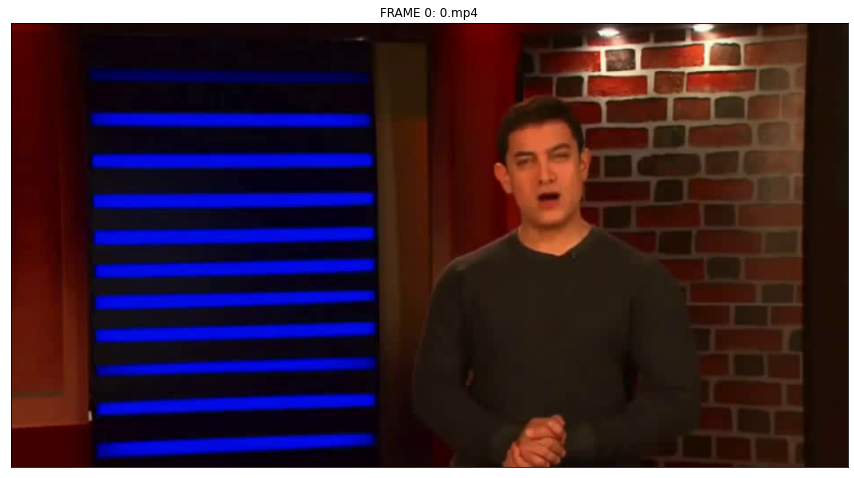

In [4]:
train_dir = R1_DIR
fig, ax = plt.subplots(1,1, figsize=(15, 15))
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
video_file = train_video_files[0]
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
print(image.shape)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 126, Left: 554, Bottom: 216, Right: 643


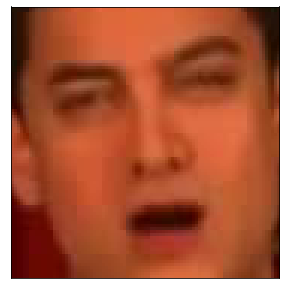

In [5]:
import face_recognition
face_locations = face_recognition.face_locations(image)

# https://github.com/ageitgey/face_recognition/blob/master/examples/find_faces_in_picture.py
from PIL import Image

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)

In [6]:
face_landmarks_list = face_recognition.face_landmarks(image)

The chin in this face has the following points: [(557, 163), (560, 175), (563, 186), (566, 197), (571, 207), (578, 216), (587, 223), (597, 228), (609, 228), (620, 225), (630, 217), (637, 208), (642, 197), (644, 186), (644, 173), (643, 161), (643, 148)]
The left_eyebrow in this face has the following points: [(564, 152), (568, 147), (576, 145), (583, 145), (590, 147)]
The right_eyebrow in this face has the following points: [(602, 144), (610, 140), (617, 137), (625, 137), (631, 141)]
The nose_bridge in this face has the following points: [(597, 153), (598, 160), (599, 167), (601, 175)]
The nose_tip in this face has the following points: [(594, 181), (598, 182), (602, 183), (606, 181), (610, 179)]
The left_eye in this face has the following points: [(573, 159), (577, 156), (582, 155), (587, 157), (583, 159), (577, 160)]
The right_eye in this face has the following points: [(610, 153), (614, 150), (619, 149), (624, 151), (620, 153), (615, 153)]
The top_lip in this face has the following p

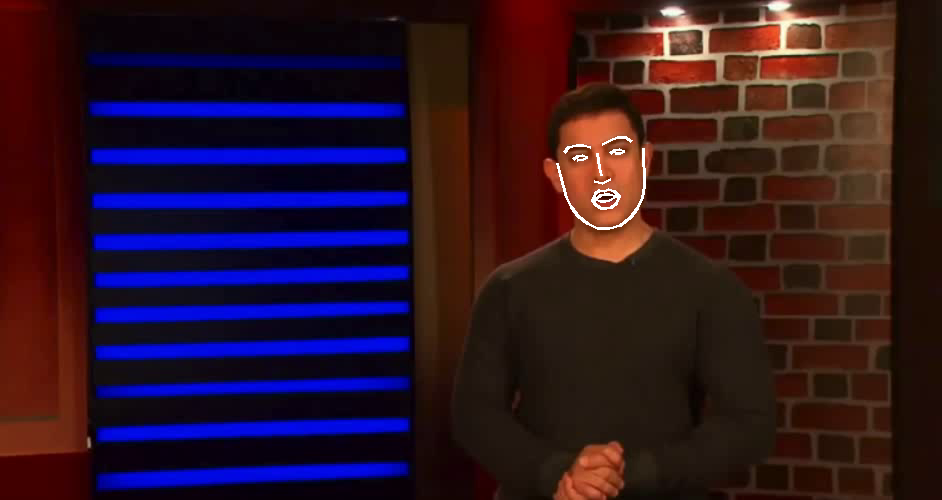

In [7]:
from PIL import Image, ImageDraw
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=3)

# Show the picture
display(pil_image)

ValueError: zero-size array to reduction operation minimum which has no identity

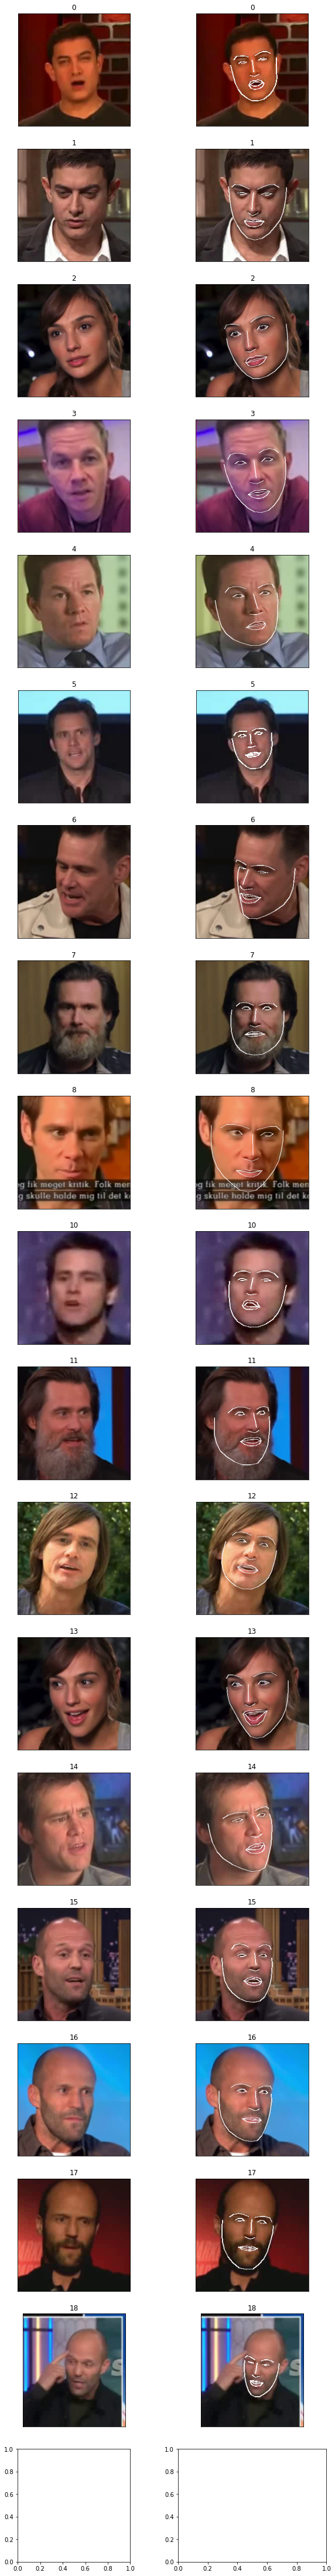

In [15]:
fig, axs = plt.subplots(19, 2, figsize=(10, 80))
axs = np.array(axs)
axs = axs.reshape(-1)
i = 0
pad = 60
for fn in range(21):
    video_file = train_video_files[fn]
    ax = axs[i]
    cap = cv.VideoCapture(video_file)
    success, image = cap.read()
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        # Print first face
        face_location = face_locations[0]
        top, right, bottom, left = face_location
        face_image = image[top-pad:bottom+pad, left-pad:right+pad]
        ax.imshow(face_image)
        ax.grid(False)
        ax.title.set_text(f'{fn}')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Find landmarks
        face_landmarks_list = face_recognition.face_landmarks(face_image)
        try:
            face_landmarks = face_landmarks_list[0]
            pil_image = Image.fromarray(face_image)
            d = ImageDraw.Draw(pil_image)
            for facial_feature in face_landmarks.keys():
                d.line(face_landmarks[facial_feature], width=2, fill='white')
            landmark_face_array = np.array(pil_image)
            ax2 = axs[i+1]
            ax2.imshow(landmark_face_array)
            ax2.grid(False)
            ax2.title.set_text(f'{fn}')
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            i += 2
        except:
            pass
plt.grid(False)
plt.tight_layout()
plt.show()

In [151]:
import math
video_file = train_video_files[0]

cap = cv.VideoCapture(video_file)
frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
print('The number of frames saved: ', len(frames))
num_frames = 30
frames_cut = []
count = math.ceil(len(frames)/num_frames)
i = 0
while i < len(frames):
    frames_cut.append(frames[i])
    i += count
print(len(frames_cut))

The number of frames saved:  469
30


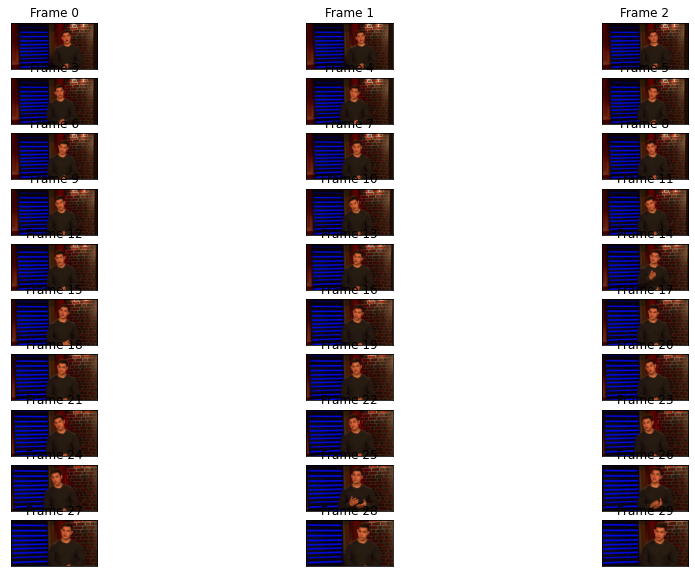

In [152]:
fig, axes = plt.subplots(10, 3, figsize=(15, 10))
axes = np.array(axes)
axes = axes.reshape(-1)

ax_ix = 0
for i in range(len(frames_cut)):
    frame = frames_cut[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    image = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

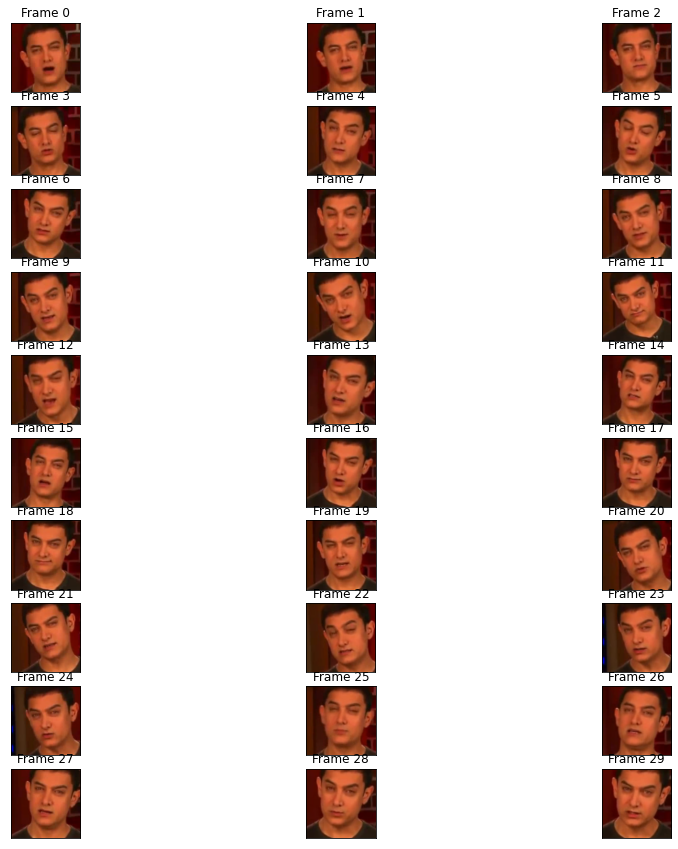

In [153]:
fig, axes = plt.subplots(10, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)
ax_ix = 0
padding = 30
face_crop = []
for i in range(len(frames_cut)):
    frame = frames_cut[i]
    #fig, ax = plt.subplots(1,1, figsize=(5, 5))
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print(f'Could not find face in frame {i}')
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    image = cv.cvtColor(frame_face, cv.COLOR_BGR2RGB)
    face_crop.append(image)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title(f'Frame {i}')
    ax_ix += 1
plt.grid(False)
plt.show()

In [154]:
print(len(face_crop))

30


In [155]:
height, width, layers = face_crop[10].shape
print(height,width)

150 149


In [156]:
video_face = cv.VideoWriter(f'../DeepFakeDetection/Dataset/Celeb_real_face/00.mkv', cv.VideoWriter_fourcc(*'mp4v'), 3, (width,height))

In [157]:
for i in range(len(face_crop)):
    img = np.array(face_crop[i] ,dtype = np.uint8)
    img = cv.cvtColor(img, cv2.COLOR_RGB2BGR)
    video_face.write(face_crop[i])

video_face.release()

In [21]:
train_dir = R1_DIR
train_video_files = [train_dir + x for x in os.listdir(train_dir)]

for j in tqdm(range(52,482)):
    video_file = train_video_files[j]
    cap = cv.VideoCapture(video_file)
    frames = []
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            frames.append(frame)
        else:
            break
    cap.release()
    print('The number of frames saved: ', len(frames))
    num_frames = 60
    frames_cut = []
    count = math.ceil(len(frames)/num_frames)
    k = 0
    while k < len(frames):
        frames_cut.append(frames[k])
        k += count
    print(len(frames_cut))
    padding = 30
    face_crop = []
    for i in range(len(frames_cut)):
        frame = frames_cut[i]
        face_locations = face_recognition.face_locations(frame)
        if len(face_locations) == 0:
            print(f'Could not find face in frame {i}')
            continue
        top, right, bottom, left = face_locations[0]
        frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
        image = frame_face[:,:,[2,1,0]]
        face_crop.append(image)
    height, width, layers = face_crop[0].shape
    video_face = cv.VideoWriter(f'../DeepFakeDetection/Dataset/real-test/{j}.mp4', cv.VideoWriter_fourcc(*'mp4v'), 3, (width,height))
    for i in range(len(face_crop)):
        img = np.array(face_crop[i])
        img = img[:,:,[2,1,0]]
        video_face.write(img)

    video_face.release()


  0%|                                                                                          | 0/430 [00:00<?, ?it/s]

The number of frames saved:  295
59
Could not find face in frame 36


  0%|▏                                                                               | 1/430 [00:15<1:51:28, 15.59s/it]

The number of frames saved:  331
56


  0%|▎                                                                               | 2/430 [00:23<1:20:37, 11.30s/it]

The number of frames saved:  330
55


  1%|▌                                                                               | 3/430 [00:42<1:42:37, 14.42s/it]

The number of frames saved:  333
56


  1%|▋                                                                               | 4/430 [01:00<1:54:19, 16.10s/it]

The number of frames saved:  310
52


  1%|▉                                                                               | 5/430 [01:18<1:58:04, 16.67s/it]

The number of frames saved:  380
55


  1%|█                                                                               | 6/430 [01:31<1:49:18, 15.47s/it]

The number of frames saved:  332
56


  2%|█▎                                                                              | 7/430 [01:50<1:56:27, 16.52s/it]

The number of frames saved:  332
56


  2%|█▍                                                                              | 8/430 [02:04<1:52:03, 15.93s/it]

The number of frames saved:  323
54


  2%|█▋                                                                              | 9/430 [02:18<1:47:22, 15.30s/it]

The number of frames saved:  342
57


  2%|█▊                                                                             | 10/430 [02:32<1:44:08, 14.88s/it]

The number of frames saved:  429
54


  3%|██                                                                             | 11/430 [02:45<1:40:21, 14.37s/it]

The number of frames saved:  310
52
Could not find face in frame 14


  3%|██▏                                                                            | 12/430 [02:58<1:36:21, 13.83s/it]

The number of frames saved:  434
55


  3%|██▍                                                                            | 13/430 [03:11<1:34:58, 13.67s/it]

The number of frames saved:  344
58


  3%|██▌                                                                            | 14/430 [03:26<1:36:40, 13.94s/it]

The number of frames saved:  364
52


  3%|██▊                                                                            | 15/430 [03:39<1:34:29, 13.66s/it]

The number of frames saved:  468
59


  4%|██▉                                                                            | 16/430 [03:53<1:35:15, 13.81s/it]

The number of frames saved:  535
60


  4%|███                                                                            | 17/430 [04:13<1:47:49, 15.67s/it]

The number of frames saved:  472
59


  4%|███▎                                                                           | 18/430 [04:27<1:44:41, 15.25s/it]

The number of frames saved:  306
51


  4%|███▍                                                                           | 19/430 [04:39<1:37:56, 14.30s/it]

The number of frames saved:  445
56


  5%|███▋                                                                           | 20/430 [04:49<1:28:30, 12.95s/it]

The number of frames saved:  307
52


  5%|███▊                                                                           | 21/430 [04:59<1:21:04, 11.89s/it]

The number of frames saved:  380
55


  5%|████                                                                           | 22/430 [05:09<1:18:00, 11.47s/it]

The number of frames saved:  470
59


  5%|████▏                                                                          | 23/430 [05:20<1:17:08, 11.37s/it]

The number of frames saved:  322
54


  6%|████▍                                                                          | 24/430 [05:30<1:13:58, 10.93s/it]

The number of frames saved:  504
56
Could not find face in frame 11


  6%|████▌                                                                          | 25/430 [05:43<1:18:27, 11.62s/it]

The number of frames saved:  451
57


  6%|████▊                                                                          | 26/430 [05:57<1:22:12, 12.21s/it]

The number of frames saved:  465
59


  6%|████▉                                                                          | 27/430 [06:11<1:25:27, 12.72s/it]

The number of frames saved:  373
54
Could not find face in frame 23
Could not find face in frame 24


  7%|█████▏                                                                         | 28/430 [06:18<1:14:30, 11.12s/it]

Could not find face in frame 52
Could not find face in frame 53
The number of frames saved:  470
59


  7%|█████▎                                                                         | 29/430 [06:32<1:19:40, 11.92s/it]

The number of frames saved:  404
58
Could not find face in frame 50
Could not find face in frame 51
Could not find face in frame 53
Could not find face in frame 54
Could not find face in frame 55


  7%|█████▌                                                                         | 30/430 [06:46<1:23:10, 12.48s/it]

The number of frames saved:  448
56


  7%|█████▋                                                                         | 31/430 [06:59<1:24:30, 12.71s/it]

The number of frames saved:  366
53


  7%|█████▉                                                                         | 32/430 [07:12<1:23:59, 12.66s/it]

The number of frames saved:  497
56


  8%|██████                                                                         | 33/430 [07:25<1:24:43, 12.81s/it]

The number of frames saved:  479
60


  8%|██████▏                                                                        | 34/430 [07:39<1:27:11, 13.21s/it]

The number of frames saved:  423
53


  8%|██████▍                                                                        | 35/430 [07:51<1:25:13, 12.95s/it]

The number of frames saved:  369
53


  8%|██████▌                                                                        | 36/430 [08:04<1:23:59, 12.79s/it]

The number of frames saved:  485
54


  9%|██████▊                                                                        | 37/430 [08:17<1:24:16, 12.87s/it]

The number of frames saved:  349
59


  9%|██████▉                                                                        | 38/430 [08:32<1:28:23, 13.53s/it]

The number of frames saved:  441
56


  9%|███████▏                                                                       | 39/430 [08:48<1:34:11, 14.45s/it]

The number of frames saved:  365
53


  9%|███████▎                                                                       | 40/430 [09:02<1:32:41, 14.26s/it]

The number of frames saved:  461
58


 10%|███████▌                                                                       | 41/430 [09:18<1:34:29, 14.57s/it]

The number of frames saved:  475
60


 10%|███████▋                                                                       | 42/430 [09:33<1:36:30, 14.92s/it]

The number of frames saved:  516
58


 10%|███████▉                                                                       | 43/430 [09:48<1:36:43, 15.00s/it]

The number of frames saved:  571
58


 10%|████████                                                                       | 44/430 [10:04<1:38:25, 15.30s/it]

The number of frames saved:  428
54


 10%|████████▎                                                                      | 45/430 [10:13<1:25:57, 13.40s/it]

The number of frames saved:  431
54


 11%|████████▍                                                                      | 46/430 [10:27<1:25:53, 13.42s/it]

The number of frames saved:  457
58


 11%|████████▋                                                                      | 47/430 [10:41<1:27:33, 13.72s/it]

The number of frames saved:  479
60
Could not find face in frame 23


 11%|████████▊                                                                      | 48/430 [10:57<1:30:16, 14.18s/it]

The number of frames saved:  441
56
Could not find face in frame 19


 11%|█████████                                                                      | 49/430 [11:10<1:29:33, 14.10s/it]

The number of frames saved:  357
60


 12%|█████████▏                                                                     | 50/430 [11:29<1:37:08, 15.34s/it]

The number of frames saved:  446
56


 12%|█████████▎                                                                     | 51/430 [11:43<1:34:10, 14.91s/it]

The number of frames saved:  490
55


 12%|█████████▌                                                                     | 52/430 [11:56<1:31:57, 14.60s/it]

The number of frames saved:  417
60


 12%|█████████▋                                                                     | 53/430 [12:11<1:32:07, 14.66s/it]

Could not find face in frame 59
The number of frames saved:  266
54


 13%|█████████▉                                                                     | 54/430 [12:25<1:29:27, 14.27s/it]

The number of frames saved:  503
56


 13%|██████████                                                                     | 55/430 [12:39<1:28:56, 14.23s/it]

The number of frames saved:  455
57
Could not find face in frame 21


 13%|██████████▎                                                                    | 56/430 [12:53<1:28:41, 14.23s/it]

The number of frames saved:  480
60


 13%|██████████▍                                                                    | 57/430 [13:08<1:30:11, 14.51s/it]

The number of frames saved:  419
60
Could not find face in frame 29


 13%|██████████▋                                                                    | 58/430 [13:23<1:30:46, 14.64s/it]

The number of frames saved:  322
54


 14%|██████████▊                                                                    | 59/430 [13:37<1:28:16, 14.28s/it]

The number of frames saved:  394
57


 14%|███████████                                                                    | 60/430 [13:51<1:27:44, 14.23s/it]

The number of frames saved:  529
59


 14%|███████████▏                                                                   | 61/430 [14:08<1:33:34, 15.22s/it]

The number of frames saved:  313
53


 14%|███████████▍                                                                   | 62/430 [14:24<1:34:07, 15.35s/it]

The number of frames saved:  472
59


 15%|███████████▌                                                                   | 63/430 [14:38<1:32:26, 15.11s/it]

The number of frames saved:  478
60


 15%|███████████▊                                                                   | 64/430 [14:53<1:31:57, 15.07s/it]

The number of frames saved:  470
59
Could not find face in frame 16


 15%|███████████▉                                                                   | 65/430 [15:08<1:30:56, 14.95s/it]

The number of frames saved:  516
58


 15%|████████████▏                                                                  | 66/430 [15:23<1:29:57, 14.83s/it]

The number of frames saved:  485
54


 16%|████████████▎                                                                  | 67/430 [15:36<1:27:20, 14.44s/it]

The number of frames saved:  508
57


 16%|████████████▍                                                                  | 68/430 [15:50<1:26:29, 14.34s/it]

The number of frames saved:  380
55


 16%|████████████▋                                                                  | 69/430 [16:04<1:24:34, 14.06s/it]

The number of frames saved:  256
52


 16%|████████████▊                                                                  | 70/430 [16:16<1:21:51, 13.64s/it]

The number of frames saved:  295
59


 17%|█████████████                                                                  | 71/430 [16:31<1:23:12, 13.91s/it]

The number of frames saved:  228
57


 17%|█████████████▏                                                                 | 72/430 [16:45<1:23:09, 13.94s/it]

The number of frames saved:  350
59
Could not find face in frame 0
Could not find face in frame 1
Could not find face in frame 2


 17%|█████████████▍                                                                 | 73/430 [17:02<1:29:07, 14.98s/it]

The number of frames saved:  399
57


 17%|█████████████▌                                                                 | 74/430 [17:16<1:27:21, 14.72s/it]

The number of frames saved:  321
54


 17%|█████████████▊                                                                 | 75/430 [17:30<1:24:24, 14.27s/it]

The number of frames saved:  448
56


 18%|█████████████▉                                                                 | 76/430 [17:44<1:23:51, 14.21s/it]

The number of frames saved:  468
59
Could not find face in frame 0
Could not find face in frame 50
Could not find face in frame 55


 18%|██████████████▏                                                                | 77/430 [17:59<1:26:12, 14.65s/it]

The number of frames saved:  478
60


 18%|██████████████▎                                                                | 78/430 [18:14<1:26:16, 14.71s/it]

The number of frames saved:  482
54


 18%|██████████████▌                                                                | 79/430 [18:27<1:22:49, 14.16s/it]

The number of frames saved:  307
52


 19%|██████████████▋                                                                | 80/430 [18:34<1:10:22, 12.06s/it]

The number of frames saved:  502
56


 19%|██████████████▉                                                                | 81/430 [18:48<1:12:52, 12.53s/it]

The number of frames saved:  290
58


 19%|███████████████                                                                | 82/430 [19:02<1:15:55, 13.09s/it]

The number of frames saved:  458
58


 19%|███████████████▏                                                               | 83/430 [19:17<1:17:50, 13.46s/it]

The number of frames saved:  327
55


 20%|███████████████▍                                                               | 84/430 [19:33<1:23:11, 14.43s/it]

The number of frames saved:  353
59


 20%|███████████████▌                                                               | 85/430 [19:48<1:24:09, 14.64s/it]

The number of frames saved:  454
57


 20%|███████████████▊                                                               | 86/430 [20:03<1:23:53, 14.63s/it]

The number of frames saved:  473
60


 20%|███████████████▉                                                               | 87/430 [20:18<1:24:59, 14.87s/it]

The number of frames saved:  483
54


 20%|████████████████▏                                                              | 88/430 [20:33<1:23:25, 14.64s/it]

The number of frames saved:  466
59
Could not find face in frame 6


 21%|████████████████▎                                                              | 89/430 [20:48<1:24:06, 14.80s/it]

The number of frames saved:  261
53


 21%|████████████████▌                                                              | 90/430 [21:01<1:21:32, 14.39s/it]

The number of frames saved:  301
51


 21%|████████████████▋                                                              | 91/430 [21:14<1:18:54, 13.97s/it]

The number of frames saved:  475
60
Could not find face in frame 0
Could not find face in frame 21
Could not find face in frame 24
Could not find face in frame 25


 21%|████████████████▉                                                              | 92/430 [21:30<1:21:10, 14.41s/it]

The number of frames saved:  457
58


 22%|█████████████████                                                              | 93/430 [21:45<1:21:55, 14.59s/it]

The number of frames saved:  459
58


 22%|█████████████████▎                                                             | 94/430 [21:59<1:22:06, 14.66s/it]

The number of frames saved:  320
54


 22%|█████████████████▍                                                             | 95/430 [22:15<1:24:04, 15.06s/it]

The number of frames saved:  467
59


 22%|█████████████████▋                                                             | 96/430 [22:31<1:24:49, 15.24s/it]

The number of frames saved:  456
57
Could not find face in frame 0


 23%|█████████████████▊                                                             | 97/430 [22:46<1:24:22, 15.20s/it]

The number of frames saved:  492
55


 23%|██████████████████                                                             | 98/430 [23:01<1:22:53, 14.98s/it]

The number of frames saved:  585
59


 23%|██████████████████▏                                                            | 99/430 [23:16<1:23:05, 15.06s/it]

Could not find face in frame 58
The number of frames saved:  321
54


 23%|██████████████████▏                                                           | 100/430 [23:27<1:17:00, 14.00s/it]

The number of frames saved:  315
53


 23%|██████████████████▎                                                           | 101/430 [23:41<1:15:34, 13.78s/it]

The number of frames saved:  310
52


 24%|██████████████████▌                                                           | 102/430 [23:54<1:14:07, 13.56s/it]

The number of frames saved:  315
53


 24%|██████████████████▋                                                           | 103/430 [24:07<1:13:32, 13.50s/it]

The number of frames saved:  335
56


 24%|██████████████████▊                                                           | 104/430 [24:22<1:15:36, 13.92s/it]

The number of frames saved:  334
56


 24%|███████████████████                                                           | 105/430 [24:36<1:15:37, 13.96s/it]

The number of frames saved:  397
57


 25%|███████████████████▏                                                          | 106/430 [24:53<1:20:48, 14.96s/it]

The number of frames saved:  312
52


 25%|███████████████████▍                                                          | 107/430 [25:07<1:18:20, 14.55s/it]

The number of frames saved:  313
53


 25%|███████████████████▌                                                          | 108/430 [25:18<1:12:49, 13.57s/it]

The number of frames saved:  458
58


 25%|███████████████████▊                                                          | 109/430 [25:27<1:05:26, 12.23s/it]

The number of frames saved:  372
54


 26%|███████████████████▉                                                          | 110/430 [25:38<1:03:19, 11.87s/it]

The number of frames saved:  499
56


 26%|████████████████████▋                                                           | 111/430 [25:47<58:40, 11.04s/it]

The number of frames saved:  398
57


 26%|████████████████████▊                                                           | 112/430 [25:56<54:51, 10.35s/it]

The number of frames saved:  409
59


 26%|█████████████████████                                                           | 113/430 [26:07<55:01, 10.41s/it]

The number of frames saved:  361
52


 27%|█████████████████████▏                                                          | 114/430 [26:18<55:46, 10.59s/it]

The number of frames saved:  497
56


 27%|████████████████████▊                                                         | 115/430 [26:33<1:03:12, 12.04s/it]

The number of frames saved:  319
54


 27%|█████████████████████▌                                                          | 116/430 [26:40<54:54, 10.49s/it]

The number of frames saved:  330
55


 27%|█████████████████████▏                                                        | 117/430 [26:54<1:00:20, 11.57s/it]

The number of frames saved:  320
54


 27%|█████████████████████▉                                                          | 118/430 [27:00<51:45,  9.95s/it]

The number of frames saved:  332
56


 28%|██████████████████████▏                                                         | 119/430 [27:14<58:05, 11.21s/it]

The number of frames saved:  326
55


 28%|█████████████████████▊                                                        | 120/430 [27:28<1:02:02, 12.01s/it]

The number of frames saved:  322
54


 28%|█████████████████████▉                                                        | 121/430 [27:42<1:04:15, 12.48s/it]

The number of frames saved:  317
53


 28%|██████████████████████▏                                                       | 122/430 [27:55<1:05:31, 12.77s/it]

The number of frames saved:  331
56


 29%|██████████████████████▎                                                       | 123/430 [28:10<1:07:36, 13.21s/it]

The number of frames saved:  310
52


 29%|██████████████████████▍                                                       | 124/430 [28:23<1:07:54, 13.32s/it]

The number of frames saved:  306
51


 29%|██████████████████████▋                                                       | 125/430 [28:36<1:07:24, 13.26s/it]

The number of frames saved:  310
52


 29%|██████████████████████▊                                                       | 126/430 [28:49<1:06:56, 13.21s/it]

The number of frames saved:  332
56


 30%|███████████████████████                                                       | 127/430 [29:04<1:08:09, 13.50s/it]

The number of frames saved:  398
57


 30%|███████████████████████▏                                                      | 128/430 [29:20<1:12:32, 14.41s/it]

The number of frames saved:  332
56


 30%|███████████████████████▍                                                      | 129/430 [29:34<1:11:15, 14.20s/it]

The number of frames saved:  314
53


 30%|███████████████████████▌                                                      | 130/430 [29:47<1:09:05, 13.82s/it]

The number of frames saved:  230
58


 30%|███████████████████████▊                                                      | 131/430 [30:01<1:09:10, 13.88s/it]

The number of frames saved:  321
54


 31%|███████████████████████▉                                                      | 132/430 [30:14<1:07:52, 13.67s/it]

The number of frames saved:  332
56


 31%|████████████████████████▏                                                     | 133/430 [30:28<1:07:50, 13.71s/it]

The number of frames saved:  329
55


 31%|████████████████████████▎                                                     | 134/430 [30:41<1:06:17, 13.44s/it]

The number of frames saved:  315
53


 31%|████████████████████████▍                                                     | 135/430 [30:53<1:04:21, 13.09s/it]

The number of frames saved:  347
58


 32%|████████████████████████▋                                                     | 136/430 [31:06<1:04:33, 13.17s/it]

The number of frames saved:  315
53


 32%|█████████████████████████▍                                                      | 137/430 [31:12<53:51, 11.03s/it]

The number of frames saved:  310
52


 32%|█████████████████████████▋                                                      | 138/430 [31:24<55:26, 11.39s/it]

The number of frames saved:  364
52


 32%|█████████████████████████▊                                                      | 139/430 [31:38<59:01, 12.17s/it]

The number of frames saved:  352
59


 33%|█████████████████████████▍                                                    | 140/430 [31:52<1:01:17, 12.68s/it]

The number of frames saved:  319
54


 33%|█████████████████████████▌                                                    | 141/430 [32:05<1:01:50, 12.84s/it]

The number of frames saved:  492
55


 33%|█████████████████████████▊                                                    | 142/430 [32:19<1:02:58, 13.12s/it]

The number of frames saved:  319
54


 33%|██████████████████████████▌                                                     | 143/430 [32:30<59:59, 12.54s/it]

The number of frames saved:  333
56


 33%|██████████████████████████                                                    | 144/430 [32:44<1:01:18, 12.86s/it]

The number of frames saved:  313
53


 34%|██████████████████████████▎                                                   | 145/430 [32:57<1:01:01, 12.85s/it]

The number of frames saved:  314
53


 34%|██████████████████████████▍                                                   | 146/430 [33:10<1:00:32, 12.79s/it]

The number of frames saved:  334
56


 34%|███████████████████████████▎                                                    | 147/430 [33:21<58:03, 12.31s/it]

The number of frames saved:  305
51


 34%|███████████████████████████▌                                                    | 148/430 [33:31<54:56, 11.69s/it]

The number of frames saved:  315
53


 35%|███████████████████████████▋                                                    | 149/430 [33:44<56:07, 11.98s/it]

The number of frames saved:  379
55


 35%|███████████████████████████▏                                                  | 150/430 [33:59<1:00:37, 12.99s/it]

The number of frames saved:  331
56


 35%|███████████████████████████▍                                                  | 151/430 [34:12<1:00:42, 13.05s/it]

The number of frames saved:  333
56


 35%|███████████████████████████▌                                                  | 152/430 [34:26<1:01:22, 13.25s/it]

The number of frames saved:  312
52


 36%|████████████████████████████▍                                                   | 153/430 [34:38<59:53, 12.97s/it]

The number of frames saved:  257
52


 36%|████████████████████████████▋                                                   | 154/430 [34:51<58:48, 12.79s/it]

The number of frames saved:  286
58


 36%|████████████████████████████▊                                                   | 155/430 [35:04<59:44, 13.03s/it]

The number of frames saved:  312
52
Could not find face in frame 25


 36%|█████████████████████████████                                                   | 156/430 [35:16<58:29, 12.81s/it]

The number of frames saved:  327
55


 37%|█████████████████████████████▏                                                  | 157/430 [35:30<58:37, 12.89s/it]

The number of frames saved:  317
53


 37%|█████████████████████████████▍                                                  | 158/430 [35:42<58:15, 12.85s/it]

The number of frames saved:  333
56
Could not find face in frame 20


 37%|█████████████████████████████▌                                                  | 159/430 [35:56<58:58, 13.06s/it]

The number of frames saved:  321
54


 37%|█████████████████████████████▊                                                  | 160/430 [36:08<58:01, 12.90s/it]

The number of frames saved:  339
57


 37%|█████████████████████████████▏                                                | 161/430 [36:24<1:01:16, 13.67s/it]

The number of frames saved:  328
55


 38%|█████████████████████████████▍                                                | 162/430 [36:37<1:00:03, 13.44s/it]

The number of frames saved:  330
55


 38%|██████████████████████████████▎                                                 | 163/430 [36:48<57:17, 12.88s/it]

The number of frames saved:  313
53


 38%|██████████████████████████████▌                                                 | 164/430 [36:59<54:08, 12.21s/it]

The number of frames saved:  291
59


 38%|██████████████████████████████▋                                                 | 165/430 [37:11<53:31, 12.12s/it]

The number of frames saved:  310
52


 39%|██████████████████████████████▉                                                 | 166/430 [37:22<51:27, 11.70s/it]

The number of frames saved:  342
57


 39%|███████████████████████████████                                                 | 167/430 [37:33<51:07, 11.67s/it]

The number of frames saved:  334
56


 39%|███████████████████████████████▎                                                | 168/430 [37:44<49:35, 11.36s/it]

The number of frames saved:  335
56


 39%|███████████████████████████████▍                                                | 169/430 [37:55<48:40, 11.19s/it]

The number of frames saved:  309
52


 40%|███████████████████████████████▋                                                | 170/430 [38:07<49:39, 11.46s/it]

The number of frames saved:  308
52


 40%|███████████████████████████████▊                                                | 171/430 [38:19<50:17, 11.65s/it]

The number of frames saved:  326
55


 40%|████████████████████████████████                                                | 172/430 [38:34<54:51, 12.76s/it]

The number of frames saved:  308
52


 40%|████████████████████████████████▏                                               | 173/430 [38:49<57:08, 13.34s/it]

The number of frames saved:  315
53


 40%|████████████████████████████████▎                                               | 174/430 [38:58<51:59, 12.19s/it]

The number of frames saved:  316
53


 41%|████████████████████████████████▌                                               | 175/430 [39:11<51:57, 12.22s/it]

The number of frames saved:  323
54


 41%|████████████████████████████████▋                                               | 176/430 [39:23<52:34, 12.42s/it]

The number of frames saved:  295
59


 41%|████████████████████████████████▉                                               | 177/430 [39:32<47:51, 11.35s/it]

The number of frames saved:  314
53


 41%|█████████████████████████████████                                               | 178/430 [39:43<46:43, 11.13s/it]

The number of frames saved:  317
53


 42%|█████████████████████████████████▎                                              | 179/430 [39:54<46:44, 11.17s/it]

The number of frames saved:  334
56


 42%|█████████████████████████████████▍                                              | 180/430 [40:06<46:44, 11.22s/it]

The number of frames saved:  342
57


 42%|█████████████████████████████████▋                                              | 181/430 [40:17<46:58, 11.32s/it]

The number of frames saved:  331
56


 42%|█████████████████████████████████▊                                              | 182/430 [40:32<50:38, 12.25s/it]

The number of frames saved:  342
57


 43%|██████████████████████████████████                                              | 183/430 [40:47<53:55, 13.10s/it]

The number of frames saved:  327
55


 43%|██████████████████████████████████▏                                             | 184/430 [41:04<58:45, 14.33s/it]

The number of frames saved:  310
52


 43%|██████████████████████████████████▍                                             | 185/430 [41:18<57:48, 14.16s/it]

The number of frames saved:  319
54


 43%|██████████████████████████████████▌                                             | 186/430 [41:32<57:42, 14.19s/it]

The number of frames saved:  329
55


 43%|██████████████████████████████████▊                                             | 187/430 [41:46<57:59, 14.32s/it]

The number of frames saved:  336
56


 44%|██████████████████████████████████▉                                             | 188/430 [42:01<58:28, 14.50s/it]

The number of frames saved:  327
55


 44%|███████████████████████████████████▏                                            | 189/430 [42:13<55:01, 13.70s/it]

The number of frames saved:  306
51


 44%|███████████████████████████████████▎                                            | 190/430 [42:25<51:58, 12.99s/it]

The number of frames saved:  338
57


 44%|███████████████████████████████████▌                                            | 191/430 [42:34<47:40, 11.97s/it]

The number of frames saved:  338
57


 45%|███████████████████████████████████▋                                            | 192/430 [42:49<50:56, 12.84s/it]

The number of frames saved:  278
56


 45%|███████████████████████████████████▉                                            | 193/430 [43:04<53:13, 13.47s/it]

The number of frames saved:  460
58


 45%|████████████████████████████████████                                            | 194/430 [43:20<55:37, 14.14s/it]

The number of frames saved:  349
59


 45%|███████████████████████████████████▎                                          | 195/430 [43:38<1:00:35, 15.47s/it]

The number of frames saved:  437
55


 46%|████████████████████████████████████▍                                           | 196/430 [43:53<59:52, 15.35s/it]

The number of frames saved:  391
56


 46%|████████████████████████████████████▋                                           | 197/430 [44:09<59:47, 15.40s/it]

The number of frames saved:  479
60


 46%|███████████████████████████████████▉                                          | 198/430 [44:26<1:01:16, 15.85s/it]

The number of frames saved:  330
55


 46%|█████████████████████████████████████                                           | 199/430 [44:41<59:57, 15.57s/it]

The number of frames saved:  383
55


 47%|█████████████████████████████████████▏                                          | 200/430 [44:56<58:52, 15.36s/it]

The number of frames saved:  311
52


 47%|█████████████████████████████████████▍                                          | 201/430 [45:09<56:11, 14.72s/it]

The number of frames saved:  459
58


 47%|█████████████████████████████████████▌                                          | 202/430 [45:23<55:42, 14.66s/it]

The number of frames saved:  477
60


 47%|█████████████████████████████████████▊                                          | 203/430 [45:41<58:35, 15.49s/it]

The number of frames saved:  459
58


 47%|█████████████████████████████████████▉                                          | 204/430 [45:57<59:14, 15.73s/it]

The number of frames saved:  491
55


 48%|██████████████████████████████████████▏                                         | 205/430 [46:12<58:32, 15.61s/it]

The number of frames saved:  400
58


 48%|██████████████████████████████████████▎                                         | 206/430 [46:29<58:58, 15.80s/it]

The number of frames saved:  444
56


 48%|██████████████████████████████████████▌                                         | 207/430 [46:45<59:04, 15.89s/it]

The number of frames saved:  467
59


 48%|█████████████████████████████████████▋                                        | 208/430 [47:02<1:00:13, 16.28s/it]

The number of frames saved:  304
51
Could not find face in frame 32


 49%|██████████████████████████████████████▉                                         | 209/430 [47:17<58:46, 15.96s/it]

The number of frames saved:  446
56


 49%|██████████████████████████████████████                                        | 210/430 [47:36<1:01:29, 16.77s/it]

The number of frames saved:  326
55


 49%|██████████████████████████████████████▎                                       | 211/430 [47:54<1:02:25, 17.10s/it]

The number of frames saved:  483
54


 49%|██████████████████████████████████████▍                                       | 212/430 [48:12<1:03:20, 17.43s/it]

The number of frames saved:  383
55


 50%|██████████████████████████████████████▋                                       | 213/430 [48:28<1:01:38, 17.04s/it]

The number of frames saved:  464
58


 50%|██████████████████████████████████████▊                                       | 214/430 [48:45<1:01:17, 17.03s/it]

The number of frames saved:  473
60


 50%|███████████████████████████████████████                                       | 215/430 [49:05<1:04:10, 17.91s/it]

The number of frames saved:  489
55


 50%|███████████████████████████████████████▏                                      | 216/430 [49:23<1:04:21, 18.04s/it]

The number of frames saved:  340
57


 50%|███████████████████████████████████████▎                                      | 217/430 [49:45<1:08:00, 19.16s/it]

The number of frames saved:  438
55


 51%|███████████████████████████████████████▌                                      | 218/430 [50:03<1:06:37, 18.86s/it]

The number of frames saved:  301
51


 51%|███████████████████████████████████████▋                                      | 219/430 [50:18<1:01:41, 17.54s/it]

The number of frames saved:  451
57


 51%|███████████████████████████████████████▉                                      | 220/430 [50:34<1:00:12, 17.20s/it]

The number of frames saved:  438
55


 51%|████████████████████████████████████████                                      | 221/430 [50:52<1:00:59, 17.51s/it]

The number of frames saved:  302
51


 52%|████████████████████████████████████████▎                                     | 222/430 [51:09<1:00:03, 17.33s/it]

The number of frames saved:  329
55


 52%|████████████████████████████████████████▍                                     | 223/430 [51:28<1:00:54, 17.65s/it]

The number of frames saved:  447
56


 52%|████████████████████████████████████████▋                                     | 224/430 [51:47<1:02:06, 18.09s/it]

The number of frames saved:  450
57


 52%|████████████████████████████████████████▊                                     | 225/430 [52:04<1:00:51, 17.81s/it]

The number of frames saved:  454
57


 53%|████████████████████████████████████████▉                                     | 226/430 [52:22<1:00:43, 17.86s/it]

The number of frames saved:  527
59


 53%|█████████████████████████████████████████▏                                    | 227/430 [52:42<1:02:25, 18.45s/it]

The number of frames saved:  309
52


 53%|██████████████████████████████████████████▍                                     | 228/430 [52:56<58:04, 17.25s/it]

The number of frames saved:  377
54


 53%|██████████████████████████████████████████▌                                     | 229/430 [53:14<58:34, 17.49s/it]

The number of frames saved:  466
59


 53%|█████████████████████████████████████████▋                                    | 230/430 [53:34<1:00:41, 18.21s/it]

The number of frames saved:  513
57


 54%|█████████████████████████████████████████▉                                    | 231/430 [53:52<1:00:29, 18.24s/it]

The number of frames saved:  464
58


 54%|███████████████████████████████████████████▏                                    | 232/430 [54:09<58:40, 17.78s/it]

The number of frames saved:  455
57


 54%|███████████████████████████████████████████▎                                    | 233/430 [54:28<59:47, 18.21s/it]

The number of frames saved:  494
55
Could not find face in frame 0
Could not find face in frame 1
Could not find face in frame 2
Could not find face in frame 6
Could not find face in frame 16


 54%|██████████████████████████████████████████▍                                   | 234/430 [54:47<1:00:03, 18.38s/it]

The number of frames saved:  551
56


 55%|██████████████████████████████████████████▋                                   | 235/430 [55:06<1:00:21, 18.57s/it]

The number of frames saved:  327
55


 55%|███████████████████████████████████████████▉                                    | 236/430 [55:24<59:28, 18.39s/it]

The number of frames saved:  328
55


 55%|████████████████████████████████████████████                                    | 237/430 [55:42<58:55, 18.32s/it]

The number of frames saved:  305
51


 55%|████████████████████████████████████████████▎                                   | 238/430 [55:59<57:00, 17.82s/it]

The number of frames saved:  333
56


 56%|████████████████████████████████████████████▍                                   | 239/430 [56:17<57:27, 18.05s/it]

The number of frames saved:  477
60


 56%|████████████████████████████████████████████▋                                   | 240/430 [56:37<58:58, 18.62s/it]

The number of frames saved:  466
59


 56%|████████████████████████████████████████████▊                                   | 241/430 [56:57<59:29, 18.88s/it]

The number of frames saved:  485
54


 56%|█████████████████████████████████████████████                                   | 242/430 [57:15<58:09, 18.56s/it]

The number of frames saved:  449
57


 57%|█████████████████████████████████████████████▏                                  | 243/430 [57:33<58:00, 18.61s/it]

The number of frames saved:  451
57


 57%|█████████████████████████████████████████████▍                                  | 244/430 [57:51<56:38, 18.27s/it]

The number of frames saved:  483
54


 57%|█████████████████████████████████████████████▌                                  | 245/430 [58:07<54:38, 17.72s/it]

The number of frames saved:  579
58


 57%|█████████████████████████████████████████████▊                                  | 246/430 [58:27<56:03, 18.28s/it]

The number of frames saved:  447
56


 57%|█████████████████████████████████████████████▉                                  | 247/430 [58:45<55:56, 18.34s/it]

The number of frames saved:  314
53


 58%|██████████████████████████████████████████████▏                                 | 248/430 [59:03<54:57, 18.12s/it]

The number of frames saved:  494
55


 58%|██████████████████████████████████████████████▎                                 | 249/430 [59:22<55:09, 18.28s/it]

The number of frames saved:  452
57


 58%|██████████████████████████████████████████████▌                                 | 250/430 [59:44<58:21, 19.45s/it]

The number of frames saved:  266
54


 58%|█████████████████████████████████████████████▌                                | 251/430 [1:00:02<56:46, 19.03s/it]

The number of frames saved:  441
56


 59%|█████████████████████████████████████████████▋                                | 252/430 [1:00:20<55:54, 18.84s/it]

The number of frames saved:  349
59


 59%|█████████████████████████████████████████████▉                                | 253/430 [1:00:40<56:04, 19.01s/it]

The number of frames saved:  464
58


 59%|██████████████████████████████████████████████                                | 254/430 [1:00:59<56:12, 19.16s/it]

The number of frames saved:  449
57


 59%|██████████████████████████████████████████████▎                               | 255/430 [1:01:18<55:56, 19.18s/it]

The number of frames saved:  322
54


 60%|██████████████████████████████████████████████▍                               | 256/430 [1:01:35<53:20, 18.40s/it]

The number of frames saved:  418
60


 60%|██████████████████████████████████████████████▌                               | 257/430 [1:01:56<55:07, 19.12s/it]

The number of frames saved:  474
60


 60%|██████████████████████████████████████████████▊                               | 258/430 [1:02:16<56:03, 19.55s/it]

The number of frames saved:  449
57


 60%|██████████████████████████████████████████████▉                               | 259/430 [1:02:35<55:06, 19.34s/it]

The number of frames saved:  468
59


 60%|███████████████████████████████████████████████▏                              | 260/430 [1:02:55<55:02, 19.42s/it]

The number of frames saved:  459
58


 61%|███████████████████████████████████████████████▎                              | 261/430 [1:03:16<55:48, 19.81s/it]

The number of frames saved:  259
52


 61%|███████████████████████████████████████████████▌                              | 262/430 [1:03:31<52:00, 18.58s/it]

The number of frames saved:  481
54


 61%|███████████████████████████████████████████████▋                              | 263/430 [1:03:49<51:11, 18.40s/it]

The number of frames saved:  427
54


 61%|███████████████████████████████████████████████▉                              | 264/430 [1:04:08<50:50, 18.37s/it]

The number of frames saved:  610
56


 62%|████████████████████████████████████████████████                              | 265/430 [1:04:27<51:30, 18.73s/it]

The number of frames saved:  464
58


 62%|████████████████████████████████████████████████▎                             | 266/430 [1:04:47<51:54, 18.99s/it]

The number of frames saved:  447
56


 62%|████████████████████████████████████████████████▍                             | 267/430 [1:05:05<51:22, 18.91s/it]

The number of frames saved:  449
57


 62%|████████████████████████████████████████████████▌                             | 268/430 [1:05:25<51:45, 19.17s/it]

The number of frames saved:  469
59


 63%|████████████████████████████████████████████████▊                             | 269/430 [1:05:44<51:08, 19.06s/it]

The number of frames saved:  267
54


 63%|████████████████████████████████████████████████▉                             | 270/430 [1:06:01<48:49, 18.31s/it]

The number of frames saved:  235
59


 63%|█████████████████████████████████████████████████▏                            | 271/430 [1:06:20<49:21, 18.63s/it]

The number of frames saved:  435
55


 63%|█████████████████████████████████████████████████▎                            | 272/430 [1:06:41<51:10, 19.43s/it]

The number of frames saved:  351
59


 63%|█████████████████████████████████████████████████▌                            | 273/430 [1:07:01<51:28, 19.67s/it]

The number of frames saved:  639
59


 64%|█████████████████████████████████████████████████▋                            | 274/430 [1:07:22<51:41, 19.88s/it]

The number of frames saved:  457
58


 64%|█████████████████████████████████████████████████▉                            | 275/430 [1:07:41<51:06, 19.78s/it]

The number of frames saved:  313
53


 64%|██████████████████████████████████████████████████                            | 276/430 [1:07:59<49:17, 19.20s/it]

The number of frames saved:  451
57


 64%|██████████████████████████████████████████████████▏                           | 277/430 [1:08:19<49:14, 19.31s/it]

The number of frames saved:  468
59


 65%|██████████████████████████████████████████████████▍                           | 278/430 [1:08:39<49:18, 19.46s/it]

The number of frames saved:  453
57


 65%|██████████████████████████████████████████████████▌                           | 279/430 [1:08:56<47:47, 18.99s/it]

The number of frames saved:  455
57


 65%|██████████████████████████████████████████████████▊                           | 280/430 [1:09:15<47:13, 18.89s/it]

The number of frames saved:  335
56
Could not find face in frame 44


 65%|██████████████████████████████████████████████████▉                           | 281/430 [1:09:34<47:03, 18.95s/it]

The number of frames saved:  446
56


 66%|███████████████████████████████████████████████████▏                          | 282/430 [1:09:54<47:02, 19.07s/it]

The number of frames saved:  459
58


 66%|███████████████████████████████████████████████████▎                          | 283/430 [1:10:16<49:11, 20.08s/it]

The number of frames saved:  332
56


 66%|███████████████████████████████████████████████████▌                          | 284/430 [1:10:38<50:09, 20.62s/it]

The number of frames saved:  458
58


 66%|███████████████████████████████████████████████████▋                          | 285/430 [1:10:58<49:27, 20.47s/it]

The number of frames saved:  501
56


 67%|███████████████████████████████████████████████████▉                          | 286/430 [1:11:17<47:43, 19.88s/it]

The number of frames saved:  460
58


 67%|████████████████████████████████████████████████████                          | 287/430 [1:11:32<44:25, 18.64s/it]

The number of frames saved:  461
58


 67%|████████████████████████████████████████████████████▏                         | 288/430 [1:11:47<41:41, 17.62s/it]

The number of frames saved:  458
58


 67%|████████████████████████████████████████████████████▍                         | 289/430 [1:12:02<39:24, 16.77s/it]

The number of frames saved:  314
53


 67%|████████████████████████████████████████████████████▌                         | 290/430 [1:12:15<36:37, 15.70s/it]

The number of frames saved:  388
56


 68%|████████████████████████████████████████████████████▊                         | 291/430 [1:12:29<34:54, 15.06s/it]

The number of frames saved:  449
57


 68%|████████████████████████████████████████████████████▉                         | 292/430 [1:12:43<33:48, 14.70s/it]

The number of frames saved:  563
57
Could not find face in frame 47
Could not find face in frame 53


 68%|█████████████████████████████████████████████████████▏                        | 293/430 [1:12:57<33:10, 14.53s/it]

The number of frames saved:  237
60


 68%|█████████████████████████████████████████████████████▎                        | 294/430 [1:13:11<32:49, 14.48s/it]

The number of frames saved:  510
57


 69%|█████████████████████████████████████████████████████▌                        | 295/430 [1:13:27<33:26, 14.86s/it]

The number of frames saved:  501
56


 69%|█████████████████████████████████████████████████████▋                        | 296/430 [1:13:41<32:18, 14.47s/it]

The number of frames saved:  479
60
Could not find face in frame 53


 69%|█████████████████████████████████████████████████████▊                        | 297/430 [1:13:55<32:10, 14.51s/it]

The number of frames saved:  380
55


 69%|██████████████████████████████████████████████████████                        | 298/430 [1:14:09<31:03, 14.12s/it]

The number of frames saved:  324
54


 70%|██████████████████████████████████████████████████████▏                       | 299/430 [1:14:22<30:05, 13.78s/it]

The number of frames saved:  467
59


 70%|██████████████████████████████████████████████████████▍                       | 300/430 [1:14:36<30:04, 13.88s/it]

The number of frames saved:  332
56


 70%|██████████████████████████████████████████████████████▌                       | 301/430 [1:14:49<29:31, 13.73s/it]

The number of frames saved:  463
58


 70%|██████████████████████████████████████████████████████▊                       | 302/430 [1:15:03<29:43, 13.93s/it]

The number of frames saved:  363
52


 70%|██████████████████████████████████████████████████████▉                       | 303/430 [1:15:16<28:42, 13.57s/it]

The number of frames saved:  307
52


 71%|███████████████████████████████████████████████████████▏                      | 304/430 [1:15:31<29:16, 13.94s/it]

The number of frames saved:  380
55


 71%|███████████████████████████████████████████████████████▎                      | 305/430 [1:15:46<30:02, 14.42s/it]

The number of frames saved:  390
56


 71%|███████████████████████████████████████████████████████▌                      | 306/430 [1:16:02<30:43, 14.86s/it]

The number of frames saved:  534
60
Could not find face in frame 25


 71%|███████████████████████████████████████████████████████▋                      | 307/430 [1:16:20<31:58, 15.60s/it]

The number of frames saved:  497
56


 72%|███████████████████████████████████████████████████████▊                      | 308/430 [1:16:35<31:44, 15.61s/it]

The number of frames saved:  478
60


 72%|████████████████████████████████████████████████████████                      | 309/430 [1:16:52<32:08, 15.94s/it]

The number of frames saved:  405
58


 72%|████████████████████████████████████████████████████████▏                     | 310/430 [1:17:08<32:01, 16.01s/it]

The number of frames saved:  307
52


 72%|████████████████████████████████████████████████████████▍                     | 311/430 [1:17:23<30:58, 15.62s/it]

The number of frames saved:  411
59


 73%|████████████████████████████████████████████████████████▌                     | 312/430 [1:17:39<31:11, 15.86s/it]

The number of frames saved:  584
59


 73%|████████████████████████████████████████████████████████▊                     | 313/430 [1:17:56<31:13, 16.02s/it]

The number of frames saved:  368
53


 73%|████████████████████████████████████████████████████████▉                     | 314/430 [1:18:10<30:09, 15.60s/it]

The number of frames saved:  477
60
Could not find face in frame 40


 73%|█████████████████████████████████████████████████████████▏                    | 315/430 [1:18:25<29:18, 15.29s/it]

The number of frames saved:  433
55
Could not find face in frame 19
Could not find face in frame 20
Could not find face in frame 21
Could not find face in frame 24
Could not find face in frame 25
Could not find face in frame 26
Could not find face in frame 27
Could not find face in frame 29
Could not find face in frame 30
Could not find face in frame 32
Could not find face in frame 34
Could not find face in frame 47
Could not find face in frame 48
Could not find face in frame 49
Could not find face in frame 50
Could not find face in frame 51
Could not find face in frame 52
Could not find face in frame 53


 73%|█████████████████████████████████████████████████████████▎                    | 316/430 [1:18:38<27:53, 14.68s/it]

Could not find face in frame 54
The number of frames saved:  489
55


 74%|█████████████████████████████████████████████████████████▌                    | 317/430 [1:18:54<28:01, 14.88s/it]

The number of frames saved:  365
53
Could not find face in frame 3
Could not find face in frame 4
Could not find face in frame 5
Could not find face in frame 8
Could not find face in frame 19
Could not find face in frame 20
Could not find face in frame 21


 74%|█████████████████████████████████████████████████████████▋                    | 318/430 [1:19:07<26:48, 14.36s/it]

The number of frames saved:  472
59
Could not find face in frame 0
Could not find face in frame 8
Could not find face in frame 19
Could not find face in frame 20
Could not find face in frame 32
Could not find face in frame 33


 74%|█████████████████████████████████████████████████████████▊                    | 319/430 [1:19:21<26:35, 14.37s/it]

The number of frames saved:  320
54


 74%|██████████████████████████████████████████████████████████                    | 320/430 [1:19:34<25:41, 14.02s/it]

The number of frames saved:  450
57
Could not find face in frame 5
Could not find face in frame 45


 75%|██████████████████████████████████████████████████████████▏                   | 321/430 [1:19:48<25:27, 14.02s/it]

The number of frames saved:  451
57
Could not find face in frame 7
Could not find face in frame 8
Could not find face in frame 9
Could not find face in frame 10
Could not find face in frame 11
Could not find face in frame 13
Could not find face in frame 14
Could not find face in frame 27


 75%|██████████████████████████████████████████████████████████▍                   | 322/430 [1:20:02<25:08, 13.97s/it]

The number of frames saved:  494
55
Could not find face in frame 41
Could not find face in frame 43


 75%|██████████████████████████████████████████████████████████▌                   | 323/430 [1:20:16<24:37, 13.80s/it]

The number of frames saved:  460
58
Could not find face in frame 9
Could not find face in frame 10
Could not find face in frame 11
Could not find face in frame 12
Could not find face in frame 13
Could not find face in frame 14
Could not find face in frame 16
Could not find face in frame 17
Could not find face in frame 18
Could not find face in frame 19
Could not find face in frame 21
Could not find face in frame 22
Could not find face in frame 25
Could not find face in frame 26
Could not find face in frame 27
Could not find face in frame 28
Could not find face in frame 29
Could not find face in frame 30
Could not find face in frame 31
Could not find face in frame 32
Could not find face in frame 33
Could not find face in frame 34
Could not find face in frame 35
Could not find face in frame 36
Could not find face in frame 37
Could not find face in frame 38
Could not find face in frame 39
Could not find face in frame 40
Could not find face in frame 41
Could not find face in frame 42
Could

 75%|██████████████████████████████████████████████████████████▊                   | 324/430 [1:20:30<24:37, 13.93s/it]

Could not find face in frame 57
The number of frames saved:  470
59
Could not find face in frame 14


 76%|██████████████████████████████████████████████████████████▉                   | 325/430 [1:20:44<24:35, 14.06s/it]

The number of frames saved:  420
60


 76%|███████████████████████████████████████████████████████████▏                  | 326/430 [1:20:59<24:45, 14.29s/it]

The number of frames saved:  373
54
Could not find face in frame 0
Could not find face in frame 2
Could not find face in frame 3
Could not find face in frame 4
Could not find face in frame 5
Could not find face in frame 6
Could not find face in frame 7
Could not find face in frame 8
Could not find face in frame 9
Could not find face in frame 10
Could not find face in frame 11
Could not find face in frame 12
Could not find face in frame 13
Could not find face in frame 14
Could not find face in frame 15
Could not find face in frame 16
Could not find face in frame 17
Could not find face in frame 18
Could not find face in frame 19
Could not find face in frame 20
Could not find face in frame 21
Could not find face in frame 23
Could not find face in frame 24
Could not find face in frame 25
Could not find face in frame 26
Could not find face in frame 27
Could not find face in frame 28
Could not find face in frame 29
Could not find face in frame 30
Could not find face in frame 31
Could not fin

 76%|███████████████████████████████████████████████████████████▎                  | 327/430 [1:21:12<23:53, 13.92s/it]

Could not find face in frame 53
The number of frames saved:  317
53


 76%|███████████████████████████████████████████████████████████▍                  | 328/430 [1:21:27<24:03, 14.15s/it]

The number of frames saved:  468
59
Could not find face in frame 36


 77%|███████████████████████████████████████████████████████████▋                  | 329/430 [1:21:41<24:02, 14.29s/it]

The number of frames saved:  457
58
Could not find face in frame 0
Could not find face in frame 15
Could not find face in frame 16
Could not find face in frame 20
Could not find face in frame 21
Could not find face in frame 22
Could not find face in frame 23
Could not find face in frame 24
Could not find face in frame 25


 77%|███████████████████████████████████████████████████████████▊                  | 330/430 [1:21:55<23:45, 14.26s/it]

Could not find face in frame 57
The number of frames saved:  460
58


 77%|████████████████████████████████████████████████████████████                  | 331/430 [1:22:10<23:25, 14.20s/it]

The number of frames saved:  582
59


 77%|████████████████████████████████████████████████████████████▏                 | 332/430 [1:22:24<23:14, 14.23s/it]

The number of frames saved:  470
59
Could not find face in frame 33


 77%|████████████████████████████████████████████████████████████▍                 | 333/430 [1:22:38<23:09, 14.33s/it]

The number of frames saved:  521
58
Could not find face in frame 1
Could not find face in frame 19
Could not find face in frame 20
Could not find face in frame 21
Could not find face in frame 35
Could not find face in frame 36
Could not find face in frame 37
Could not find face in frame 38
Could not find face in frame 39
Could not find face in frame 40
Could not find face in frame 41
Could not find face in frame 42
Could not find face in frame 43
Could not find face in frame 44
Could not find face in frame 53
Could not find face in frame 55


 78%|████████████████████████████████████████████████████████████▌                 | 334/430 [1:22:53<22:53, 14.30s/it]

The number of frames saved:  481
54


 78%|████████████████████████████████████████████████████████████▊                 | 335/430 [1:23:06<22:06, 13.97s/it]

The number of frames saved:  457
58


 78%|████████████████████████████████████████████████████████████▉                 | 336/430 [1:23:20<22:05, 14.10s/it]

The number of frames saved:  630
58


 78%|█████████████████████████████████████████████████████████████▏                | 337/430 [1:23:37<23:06, 14.90s/it]

The number of frames saved:  323
54


 79%|█████████████████████████████████████████████████████████████▎                | 338/430 [1:23:52<22:56, 14.97s/it]

The number of frames saved:  316
53


 79%|█████████████████████████████████████████████████████████████▍                | 339/430 [1:24:08<23:02, 15.19s/it]

The number of frames saved:  372
54


 79%|█████████████████████████████████████████████████████████████▋                | 340/430 [1:24:23<22:54, 15.28s/it]

The number of frames saved:  458
58


 79%|█████████████████████████████████████████████████████████████▊                | 341/430 [1:24:40<23:07, 15.59s/it]

The number of frames saved:  294
59


 80%|██████████████████████████████████████████████████████████████                | 342/430 [1:24:56<23:16, 15.87s/it]

The number of frames saved:  557
56


 80%|██████████████████████████████████████████████████████████████▏               | 343/430 [1:25:13<23:17, 16.06s/it]

The number of frames saved:  381
55


 80%|██████████████████████████████████████████████████████████████▍               | 344/430 [1:25:28<22:45, 15.87s/it]

The number of frames saved:  530
59


 80%|██████████████████████████████████████████████████████████████▌               | 345/430 [1:25:45<23:02, 16.26s/it]

The number of frames saved:  280
56


 80%|██████████████████████████████████████████████████████████████▊               | 346/430 [1:26:01<22:42, 16.22s/it]

The number of frames saved:  295
59


 81%|██████████████████████████████████████████████████████████████▉               | 347/430 [1:26:18<22:43, 16.43s/it]

The number of frames saved:  270
54


 81%|███████████████████████████████████████████████████████████████▏              | 348/430 [1:26:34<22:06, 16.18s/it]

The number of frames saved:  555
56


 81%|███████████████████████████████████████████████████████████████▎              | 349/430 [1:26:50<21:47, 16.14s/it]

The number of frames saved:  363
52


 81%|███████████████████████████████████████████████████████████████▍              | 350/430 [1:27:05<21:02, 15.78s/it]

The number of frames saved:  740
57


 82%|███████████████████████████████████████████████████████████████▋              | 351/430 [1:27:21<20:54, 15.88s/it]

The number of frames saved:  161
54


 82%|███████████████████████████████████████████████████████████████▊              | 352/430 [1:27:36<20:12, 15.54s/it]

The number of frames saved:  415
60


 82%|████████████████████████████████████████████████████████████████              | 353/430 [1:27:52<20:18, 15.83s/it]

The number of frames saved:  291
59


 82%|████████████████████████████████████████████████████████████████▏             | 354/430 [1:28:09<20:14, 15.98s/it]

The number of frames saved:  458
58


 83%|████████████████████████████████████████████████████████████████▍             | 355/430 [1:28:25<20:10, 16.14s/it]

The number of frames saved:  457
58
Could not find face in frame 48


 83%|████████████████████████████████████████████████████████████████▌             | 356/430 [1:28:41<19:56, 16.16s/it]

The number of frames saved:  525
59


 83%|████████████████████████████████████████████████████████████████▊             | 357/430 [1:28:58<19:46, 16.26s/it]

The number of frames saved:  401
58
Could not find face in frame 7


 83%|████████████████████████████████████████████████████████████████▉             | 358/430 [1:29:14<19:31, 16.28s/it]

The number of frames saved:  566
57


 83%|█████████████████████████████████████████████████████████████████             | 359/430 [1:29:31<19:19, 16.33s/it]

The number of frames saved:  215
54


 84%|█████████████████████████████████████████████████████████████████▎            | 360/430 [1:29:46<18:41, 16.03s/it]

The number of frames saved:  303
51


 84%|█████████████████████████████████████████████████████████████████▍            | 361/430 [1:30:01<18:13, 15.84s/it]

The number of frames saved:  514
58


 84%|█████████████████████████████████████████████████████████████████▋            | 362/430 [1:30:18<18:18, 16.15s/it]

The number of frames saved:  387
56


 84%|█████████████████████████████████████████████████████████████████▊            | 363/430 [1:30:34<18:02, 16.16s/it]

The number of frames saved:  570
57


 85%|██████████████████████████████████████████████████████████████████            | 364/430 [1:30:50<17:41, 16.08s/it]

The number of frames saved:  437
55


 85%|██████████████████████████████████████████████████████████████████▏           | 365/430 [1:31:05<17:08, 15.82s/it]

The number of frames saved:  364
52


 85%|██████████████████████████████████████████████████████████████████▍           | 366/430 [1:31:20<16:21, 15.33s/it]

The number of frames saved:  492
55


 85%|██████████████████████████████████████████████████████████████████▌           | 367/430 [1:31:35<16:04, 15.32s/it]

The number of frames saved:  362
52


 86%|██████████████████████████████████████████████████████████████████▊           | 368/430 [1:31:49<15:31, 15.02s/it]

The number of frames saved:  420
60


 86%|██████████████████████████████████████████████████████████████████▉           | 369/430 [1:32:06<15:41, 15.43s/it]

The number of frames saved:  401
58


 86%|███████████████████████████████████████████████████████████████████           | 370/430 [1:32:22<15:36, 15.62s/it]

The number of frames saved:  456
57


 86%|███████████████████████████████████████████████████████████████████▎          | 371/430 [1:32:38<15:28, 15.73s/it]

The number of frames saved:  410
59


 87%|███████████████████████████████████████████████████████████████████▍          | 372/430 [1:32:54<15:25, 15.95s/it]

The number of frames saved:  461
58


 87%|███████████████████████████████████████████████████████████████████▋          | 373/430 [1:33:10<15:11, 15.99s/it]

The number of frames saved:  314
53


 87%|███████████████████████████████████████████████████████████████████▊          | 374/430 [1:33:25<14:30, 15.54s/it]

The number of frames saved:  345
58


 87%|████████████████████████████████████████████████████████████████████          | 375/430 [1:33:41<14:20, 15.64s/it]

The number of frames saved:  534
60


 87%|████████████████████████████████████████████████████████████████████▏         | 376/430 [1:33:57<14:19, 15.92s/it]

The number of frames saved:  224
56


 88%|████████████████████████████████████████████████████████████████████▍         | 377/430 [1:34:13<13:54, 15.74s/it]

The number of frames saved:  337
57
Could not find face in frame 15
Could not find face in frame 16
Could not find face in frame 17
Could not find face in frame 32
Could not find face in frame 33


 88%|████████████████████████████████████████████████████████████████████▌         | 378/430 [1:34:28<13:37, 15.72s/it]

The number of frames saved:  315
53


 88%|████████████████████████████████████████████████████████████████████▋         | 379/430 [1:34:43<13:09, 15.47s/it]

The number of frames saved:  308
52


 88%|████████████████████████████████████████████████████████████████████▉         | 380/430 [1:34:59<12:53, 15.48s/it]

The number of frames saved:  311
52


 89%|█████████████████████████████████████████████████████████████████████         | 381/430 [1:35:08<11:04, 13.55s/it]

The number of frames saved:  315
53


 89%|█████████████████████████████████████████████████████████████████████▎        | 382/430 [1:35:16<09:36, 12.02s/it]

The number of frames saved:  247
50


 89%|█████████████████████████████████████████████████████████████████████▍        | 383/430 [1:35:24<08:29, 10.84s/it]

The number of frames saved:  306
51


 89%|█████████████████████████████████████████████████████████████████████▋        | 384/430 [1:35:30<07:06,  9.27s/it]

The number of frames saved:  312
52


 90%|█████████████████████████████████████████████████████████████████████▊        | 385/430 [1:35:43<07:55, 10.58s/it]

The number of frames saved:  201
51


 90%|██████████████████████████████████████████████████████████████████████        | 386/430 [1:35:57<08:18, 11.34s/it]

The number of frames saved:  479
60


 90%|██████████████████████████████████████████████████████████████████████▏       | 387/430 [1:36:13<09:11, 12.83s/it]

The number of frames saved:  274
55


 90%|██████████████████████████████████████████████████████████████████████▍       | 388/430 [1:36:27<09:20, 13.35s/it]

The number of frames saved:  269
54


 90%|██████████████████████████████████████████████████████████████████████▌       | 389/430 [1:36:42<09:17, 13.60s/it]

The number of frames saved:  298
60


 91%|██████████████████████████████████████████████████████████████████████▋       | 390/430 [1:36:57<09:29, 14.25s/it]

The number of frames saved:  327
55


 91%|██████████████████████████████████████████████████████████████████████▉       | 391/430 [1:37:09<08:50, 13.61s/it]

The number of frames saved:  335
56


 91%|███████████████████████████████████████████████████████████████████████       | 392/430 [1:37:22<08:21, 13.19s/it]

The number of frames saved:  320
54


 91%|███████████████████████████████████████████████████████████████████████▎      | 393/430 [1:37:27<06:42, 10.88s/it]

The number of frames saved:  337
57


 92%|███████████████████████████████████████████████████████████████████████▍      | 394/430 [1:37:39<06:46, 11.30s/it]

The number of frames saved:  323
54


 92%|███████████████████████████████████████████████████████████████████████▋      | 395/430 [1:37:51<06:35, 11.31s/it]

The number of frames saved:  338
57


 92%|███████████████████████████████████████████████████████████████████████▊      | 396/430 [1:38:03<06:30, 11.49s/it]

The number of frames saved:  324
54


 92%|████████████████████████████████████████████████████████████████████████      | 397/430 [1:38:14<06:14, 11.35s/it]

The number of frames saved:  464
58


 93%|████████████████████████████████████████████████████████████████████████▏     | 398/430 [1:38:30<06:52, 12.88s/it]

The number of frames saved:  341
57


 93%|████████████████████████████████████████████████████████████████████████▍     | 399/430 [1:38:44<06:48, 13.19s/it]

The number of frames saved:  371
53


 93%|████████████████████████████████████████████████████████████████████████▌     | 400/430 [1:38:53<06:00, 12.03s/it]

The number of frames saved:  400
58


 93%|████████████████████████████████████████████████████████████████████████▋     | 401/430 [1:39:02<05:21, 11.08s/it]

The number of frames saved:  451
57


 93%|████████████████████████████████████████████████████████████████████████▉     | 402/430 [1:39:12<05:02, 10.79s/it]

The number of frames saved:  409
59


 94%|█████████████████████████████████████████████████████████████████████████     | 403/430 [1:39:20<04:25,  9.84s/it]

The number of frames saved:  422
53


 94%|█████████████████████████████████████████████████████████████████████████▎    | 404/430 [1:39:29<04:05,  9.45s/it]

The number of frames saved:  412
59


 94%|█████████████████████████████████████████████████████████████████████████▍    | 405/430 [1:39:37<03:52,  9.28s/it]

The number of frames saved:  315
53


 94%|█████████████████████████████████████████████████████████████████████████▋    | 406/430 [1:39:50<04:09, 10.40s/it]

The number of frames saved:  306
51


 95%|█████████████████████████████████████████████████████████████████████████▊    | 407/430 [1:40:03<04:11, 10.94s/it]

The number of frames saved:  311
52


 95%|██████████████████████████████████████████████████████████████████████████    | 408/430 [1:40:12<03:50, 10.50s/it]

The number of frames saved:  520
58


 95%|██████████████████████████████████████████████████████████████████████████▏   | 409/430 [1:40:28<04:16, 12.22s/it]

The number of frames saved:  337
57


 95%|██████████████████████████████████████████████████████████████████████████▎   | 410/430 [1:40:41<04:08, 12.44s/it]

The number of frames saved:  325
55


 96%|██████████████████████████████████████████████████████████████████████████▌   | 411/430 [1:40:53<03:54, 12.34s/it]

The number of frames saved:  324
54


 96%|██████████████████████████████████████████████████████████████████████████▋   | 412/430 [1:41:05<03:40, 12.25s/it]

The number of frames saved:  328
55


 96%|██████████████████████████████████████████████████████████████████████████▉   | 413/430 [1:41:18<03:28, 12.28s/it]

The number of frames saved:  347
58


 96%|███████████████████████████████████████████████████████████████████████████   | 414/430 [1:41:30<03:14, 12.17s/it]

The number of frames saved:  334
56


 97%|███████████████████████████████████████████████████████████████████████████▎  | 415/430 [1:41:41<02:59, 11.93s/it]

The number of frames saved:  234
59


 97%|███████████████████████████████████████████████████████████████████████████▍  | 416/430 [1:41:55<02:55, 12.55s/it]

The number of frames saved:  262
53
Could not find face in frame 41


 97%|███████████████████████████████████████████████████████████████████████████▋  | 417/430 [1:42:08<02:44, 12.62s/it]

The number of frames saved:  334
56


 97%|███████████████████████████████████████████████████████████████████████████▊  | 418/430 [1:42:21<02:35, 12.92s/it]

The number of frames saved:  178
60
Could not find face in frame 4
Could not find face in frame 5
Could not find face in frame 9
Could not find face in frame 16
Could not find face in frame 17
Could not find face in frame 18
Could not find face in frame 20
Could not find face in frame 50


 97%|████████████████████████████████████████████████████████████████████████████  | 419/430 [1:42:34<02:20, 12.81s/it]

The number of frames saved:  239
60


 98%|████████████████████████████████████████████████████████████████████████████▏ | 420/430 [1:42:46<02:04, 12.43s/it]

The number of frames saved:  225
57


 98%|████████████████████████████████████████████████████████████████████████████▎ | 421/430 [1:42:58<01:51, 12.37s/it]

The number of frames saved:  165
55


 98%|████████████████████████████████████████████████████████████████████████████▌ | 422/430 [1:43:10<01:37, 12.20s/it]

The number of frames saved:  317
53


 98%|████████████████████████████████████████████████████████████████████████████▋ | 423/430 [1:43:21<01:23, 11.98s/it]

The number of frames saved:  322
54


 99%|████████████████████████████████████████████████████████████████████████████▉ | 424/430 [1:43:29<01:03, 10.63s/it]

The number of frames saved:  310
52


 99%|█████████████████████████████████████████████████████████████████████████████ | 425/430 [1:43:41<00:55, 11.18s/it]

The number of frames saved:  283
57


 99%|█████████████████████████████████████████████████████████████████████████████▎| 426/430 [1:43:55<00:47, 11.91s/it]

The number of frames saved:  273
55


 99%|█████████████████████████████████████████████████████████████████████████████▍| 427/430 [1:44:08<00:36, 12.31s/it]

The number of frames saved:  312
52


100%|█████████████████████████████████████████████████████████████████████████████▋| 428/430 [1:44:21<00:24, 12.45s/it]

The number of frames saved:  365
53


100%|█████████████████████████████████████████████████████████████████████████████▊| 429/430 [1:44:33<00:12, 12.49s/it]

The number of frames saved:  333
56


100%|██████████████████████████████████████████████████████████████████████████████| 430/430 [1:44:47<00:00, 14.62s/it]


In [22]:
train_dir_2 = R2_DIR
train_video_files = [train_dir_2 + x for x in os.listdir(train_dir_2)]

for j in tqdm(range(82,230)):
    video_file = train_video_files[j]
    cap = cv.VideoCapture(video_file)
    frames = []
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            frames.append(frame)
        else:
            break
    cap.release()
    print('The number of frames saved: ', len(frames))
    num_frames = 60
    frames_cut = []
    count = math.ceil(len(frames)/num_frames)
    k = 0
    while k < len(frames):
        frames_cut.append(frames[k])
        k += count
    print(len(frames_cut))
    padding = 30
    face_crop = []
    for i in range(len(frames_cut)):
        frame = frames_cut[i]
        face_locations = face_recognition.face_locations(frame)
        if len(face_locations) == 0:
            print(f'Could not find face in frame {i}')
            continue
        top, right, bottom, left = face_locations[0]
        frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
        image = frame_face[:,:,[2,1,0]]
        face_crop.append(image)
    height, width, layers = face_crop[0].shape
    video_face = cv.VideoWriter(f'../DeepFakeDetection/Dataset/real-test/00{j}.mp4', cv.VideoWriter_fourcc(*'mp4v'), 3, (width,height))
    print(len(face_crop))
    for i in range(len(face_crop)):
        img = np.array(face_crop[i])
        img = img[:,:,[2,1,0]]
        video_face.write(img)

    video_face.release()


  0%|                                                                                          | 0/148 [00:00<?, ?it/s]

The number of frames saved:  474
60


  1%|▌                                                                               | 1/148 [00:34<1:24:45, 34.60s/it]

60
The number of frames saved:  495
55
Could not find face in frame 39
Could not find face in frame 40


  1%|█                                                                               | 2/148 [01:05<1:19:32, 32.69s/it]

53
The number of frames saved:  480
60


  2%|█▌                                                                              | 3/148 [01:38<1:19:18, 32.82s/it]

60
The number of frames saved:  456
57


  3%|██▏                                                                             | 4/148 [02:10<1:17:23, 32.24s/it]

57
The number of frames saved:  480
60


  3%|██▋                                                                             | 5/148 [02:38<1:13:40, 30.91s/it]

60
The number of frames saved:  462
58


  4%|███▏                                                                            | 6/148 [03:08<1:11:52, 30.37s/it]

58
The number of frames saved:  459
58


  5%|███▊                                                                            | 7/148 [03:38<1:11:22, 30.37s/it]

58
The number of frames saved:  309
52


  5%|████▎                                                                           | 8/148 [04:04<1:07:21, 28.87s/it]

52
The number of frames saved:  468
59


  6%|████▊                                                                           | 9/148 [04:34<1:08:04, 29.38s/it]

59
The number of frames saved:  463
58


  7%|█████▎                                                                         | 10/148 [05:06<1:09:15, 30.11s/it]

58
The number of frames saved:  453
57


  7%|█████▊                                                                         | 11/148 [05:35<1:08:03, 29.80s/it]

57
The number of frames saved:  455
57


  8%|██████▍                                                                        | 12/148 [06:03<1:06:35, 29.38s/it]

57
The number of frames saved:  460
58


  9%|██████▉                                                                        | 13/148 [06:33<1:06:02, 29.35s/it]

58
The number of frames saved:  611
56


  9%|███████▍                                                                       | 14/148 [07:03<1:06:27, 29.76s/it]

56
The number of frames saved:  424
53
Could not find face in frame 49


 10%|████████                                                                       | 15/148 [07:32<1:04:58, 29.31s/it]

52
The number of frames saved:  413
59
Could not find face in frame 13
Could not find face in frame 19
Could not find face in frame 20
Could not find face in frame 24


 11%|████████▌                                                                      | 16/148 [08:03<1:05:50, 29.93s/it]

55
The number of frames saved:  446
56


 11%|█████████                                                                      | 17/148 [08:33<1:05:08, 29.84s/it]

56
The number of frames saved:  469
59


 12%|█████████▌                                                                     | 18/148 [09:04<1:05:43, 30.33s/it]

59
The number of frames saved:  384
55


 13%|██████████▏                                                                    | 19/148 [09:36<1:06:02, 30.72s/it]

55
The number of frames saved:  456
57


 14%|██████████▋                                                                    | 20/148 [10:07<1:06:07, 31.00s/it]

57
The number of frames saved:  324
54


 14%|███████████▏                                                                   | 21/148 [10:36<1:04:14, 30.35s/it]

54
The number of frames saved:  478
60


 15%|███████████▋                                                                   | 22/148 [11:08<1:04:43, 30.82s/it]

60
The number of frames saved:  483
54
Could not find face in frame 20


 16%|████████████▎                                                                  | 23/148 [11:37<1:02:38, 30.06s/it]

53
The number of frames saved:  523
59


 16%|████████████▊                                                                  | 24/148 [12:07<1:02:06, 30.05s/it]

59
The number of frames saved:  448
56


 17%|█████████████▎                                                                 | 25/148 [12:36<1:01:18, 29.91s/it]

56
The number of frames saved:  468
59


 18%|█████████████▉                                                                 | 26/148 [13:08<1:01:52, 30.43s/it]

59
The number of frames saved:  480
60


 18%|██████████████▍                                                                | 27/148 [13:39<1:02:06, 30.79s/it]

60
The number of frames saved:  428
54


 19%|███████████████▎                                                                 | 28/148 [14:07<59:46, 29.88s/it]

54
The number of frames saved:  468
59


 20%|███████████████▍                                                               | 29/148 [14:38<1:00:01, 30.26s/it]

59
The number of frames saved:  466
59


 20%|████████████████▍                                                                | 30/148 [15:09<59:32, 30.28s/it]

59
The number of frames saved:  512
57


 21%|████████████████▉                                                                | 31/148 [15:38<58:17, 29.89s/it]

57
The number of frames saved:  471
59


 22%|█████████████████▌                                                               | 32/148 [16:09<58:24, 30.22s/it]

59
The number of frames saved:  470
59


 22%|██████████████████                                                               | 33/148 [16:40<58:20, 30.44s/it]

59
The number of frames saved:  533
60


 23%|██████████████████▌                                                              | 34/148 [17:11<58:22, 30.72s/it]

60
The number of frames saved:  455
57


 24%|███████████████████▏                                                             | 35/148 [17:41<57:18, 30.43s/it]

57
The number of frames saved:  477
60


 24%|███████████████████▋                                                             | 36/148 [18:13<57:40, 30.90s/it]

60
The number of frames saved:  471
59


 25%|████████████████████▎                                                            | 37/148 [18:43<56:49, 30.72s/it]

59
The number of frames saved:  464
58


 26%|████████████████████▊                                                            | 38/148 [19:13<55:52, 30.47s/it]

58
The number of frames saved:  363
52


 26%|█████████████████████▎                                                           | 39/148 [19:39<53:02, 29.20s/it]

52
The number of frames saved:  496
56


 27%|█████████████████████▉                                                           | 40/148 [20:08<52:08, 28.97s/it]

56
The number of frames saved:  456
57


 28%|██████████████████████▍                                                          | 41/148 [20:37<51:45, 29.02s/it]

57
The number of frames saved:  422
53


 28%|██████████████████████▉                                                          | 42/148 [21:04<50:19, 28.48s/it]

53
The number of frames saved:  470
59
Could not find face in frame 36


 29%|███████████████████████▌                                                         | 43/148 [21:33<50:14, 28.71s/it]

58
The number of frames saved:  493
55


 30%|████████████████████████                                                         | 44/148 [22:02<50:01, 28.86s/it]

55
The number of frames saved:  471
59


 30%|████████████████████████▋                                                        | 45/148 [22:34<51:13, 29.84s/it]

59
The number of frames saved:  447
56


 31%|█████████████████████████▏                                                       | 46/148 [23:04<50:30, 29.71s/it]

56
The number of frames saved:  442
56


 32%|█████████████████████████▋                                                       | 47/148 [23:36<51:11, 30.41s/it]

56
The number of frames saved:  461
58


 32%|██████████████████████████▎                                                      | 48/148 [24:06<50:36, 30.37s/it]

58
The number of frames saved:  464
58


 33%|██████████████████████████▊                                                      | 49/148 [24:37<50:15, 30.46s/it]

58
The number of frames saved:  454
57


 34%|███████████████████████████▎                                                     | 50/148 [25:07<49:22, 30.23s/it]

57
The number of frames saved:  467
59


 34%|███████████████████████████▉                                                     | 51/148 [25:37<49:11, 30.43s/it]

59
The number of frames saved:  480
60


 35%|████████████████████████████▍                                                    | 52/148 [26:09<49:22, 30.86s/it]

60
The number of frames saved:  517
58


 36%|█████████████████████████████                                                    | 53/148 [26:39<48:29, 30.62s/it]

58
The number of frames saved:  499
56
Could not find face in frame 34


 36%|█████████████████████████████▌                                                   | 54/148 [27:06<46:13, 29.50s/it]

55
The number of frames saved:  461
58


 37%|██████████████████████████████                                                   | 55/148 [27:31<43:25, 28.01s/it]

58
The number of frames saved:  462
58


 38%|██████████████████████████████▋                                                  | 56/148 [27:52<39:48, 25.96s/it]

58
The number of frames saved:  451
57


 39%|███████████████████████████████▏                                                 | 57/148 [28:09<35:21, 23.31s/it]

57
The number of frames saved:  425
54


 39%|███████████████████████████████▋                                                 | 58/148 [28:25<31:44, 21.16s/it]

54
The number of frames saved:  499
56


 40%|████████████████████████████████▎                                                | 59/148 [28:44<30:26, 20.52s/it]

56
The number of frames saved:  451
57


 41%|████████████████████████████████▊                                                | 60/148 [29:03<29:13, 19.92s/it]

57
The number of frames saved:  467
59


 41%|█████████████████████████████████▍                                               | 61/148 [29:20<27:44, 19.13s/it]

59
The number of frames saved:  445
56
Could not find face in frame 3


 42%|█████████████████████████████████▉                                               | 62/148 [29:37<26:22, 18.40s/it]

55
The number of frames saved:  462
58
Could not find face in frame 52


 43%|██████████████████████████████████▍                                              | 63/148 [29:54<25:26, 17.96s/it]

57
The number of frames saved:  463
58


 43%|███████████████████████████████████                                              | 64/148 [30:11<24:43, 17.67s/it]

58
The number of frames saved:  481
54


 44%|███████████████████████████████████▌                                             | 65/148 [30:28<24:18, 17.57s/it]

54
The number of frames saved:  473
60


 45%|████████████████████████████████████                                             | 66/148 [30:47<24:43, 18.09s/it]

60
The number of frames saved:  463
58


 45%|████████████████████████████████████▋                                            | 67/148 [31:08<25:36, 18.98s/it]

58
The number of frames saved:  472
59


 46%|█████████████████████████████████████▏                                           | 68/148 [31:28<25:22, 19.03s/it]

59
The number of frames saved:  510
57


 47%|█████████████████████████████████████▊                                           | 69/148 [31:47<25:25, 19.30s/it]

57
The number of frames saved:  463
58


 47%|██████████████████████████████████████▎                                          | 70/148 [32:08<25:24, 19.55s/it]

58
The number of frames saved:  461
58


 48%|██████████████████████████████████████▊                                          | 71/148 [32:26<24:43, 19.27s/it]

58
The number of frames saved:  295
59


 49%|███████████████████████████████████████▍                                         | 72/148 [32:46<24:30, 19.35s/it]

59
The number of frames saved:  505
57


 49%|███████████████████████████████████████▉                                         | 73/148 [33:04<23:47, 19.03s/it]

57
The number of frames saved:  458
58


 50%|████████████████████████████████████████▌                                        | 74/148 [33:23<23:18, 18.90s/it]

58
The number of frames saved:  455
57


 51%|█████████████████████████████████████████                                        | 75/148 [33:41<22:50, 18.78s/it]

57
The number of frames saved:  467
59


 51%|█████████████████████████████████████████▌                                       | 76/148 [34:00<22:28, 18.73s/it]

59
The number of frames saved:  459
58
Could not find face in frame 51
Could not find face in frame 52


 52%|██████████████████████████████████████████▏                                      | 77/148 [34:20<22:41, 19.18s/it]

56
The number of frames saved:  381
55


 53%|██████████████████████████████████████████▋                                      | 78/148 [34:37<21:46, 18.67s/it]

55
The number of frames saved:  456
57


 53%|███████████████████████████████████████████▏                                     | 79/148 [34:56<21:21, 18.57s/it]

57
The number of frames saved:  383
55


 54%|███████████████████████████████████████████▊                                     | 80/148 [35:13<20:40, 18.24s/it]

55
The number of frames saved:  472
59


 55%|████████████████████████████████████████████▎                                    | 81/148 [35:32<20:30, 18.36s/it]

59
The number of frames saved:  464
58


 55%|████████████████████████████████████████████▉                                    | 82/148 [35:50<20:08, 18.31s/it]

58
The number of frames saved:  450
57


 56%|█████████████████████████████████████████████▍                                   | 83/148 [36:08<19:47, 18.27s/it]

57
The number of frames saved:  459
58


 57%|█████████████████████████████████████████████▉                                   | 84/148 [36:30<20:32, 19.26s/it]

58
The number of frames saved:  471
59


 57%|██████████████████████████████████████████████▌                                  | 85/148 [36:51<20:45, 19.77s/it]

59
The number of frames saved:  476
60


 58%|███████████████████████████████████████████████                                  | 86/148 [37:15<21:39, 20.96s/it]

60
The number of frames saved:  470
59


 59%|███████████████████████████████████████████████▌                                 | 87/148 [37:35<21:05, 20.74s/it]

59
The number of frames saved:  367
53


 59%|████████████████████████████████████████████████▏                                | 88/148 [37:52<19:45, 19.75s/it]

53
The number of frames saved:  464
58


 60%|████████████████████████████████████████████████▋                                | 89/148 [38:11<19:06, 19.44s/it]

58
The number of frames saved:  468
59


 61%|█████████████████████████████████████████████████▎                               | 90/148 [38:30<18:41, 19.33s/it]

59
The number of frames saved:  417
60
Could not find face in frame 58


 61%|█████████████████████████████████████████████████▊                               | 91/148 [38:49<18:23, 19.36s/it]

59
The number of frames saved:  468
59


 62%|██████████████████████████████████████████████████▎                              | 92/148 [39:10<18:29, 19.82s/it]

59
The number of frames saved:  534
60


 63%|██████████████████████████████████████████████████▉                              | 93/148 [39:29<17:57, 19.59s/it]

60
The number of frames saved:  463
58


 64%|███████████████████████████████████████████████████▍                             | 94/148 [39:48<17:23, 19.33s/it]

58
The number of frames saved:  466
59


 64%|███████████████████████████████████████████████████▉                             | 95/148 [40:07<16:59, 19.24s/it]

59
The number of frames saved:  507
57


 65%|████████████████████████████████████████████████████▌                            | 96/148 [40:26<16:30, 19.05s/it]

57
The number of frames saved:  474
60


 66%|█████████████████████████████████████████████████████                            | 97/148 [40:45<16:16, 19.14s/it]

60
The number of frames saved:  478
60


 66%|█████████████████████████████████████████████████████▋                           | 98/148 [41:05<16:06, 19.32s/it]

60
The number of frames saved:  478
60


 67%|██████████████████████████████████████████████████████▏                          | 99/148 [41:25<16:01, 19.62s/it]

60
The number of frames saved:  429
54


 68%|██████████████████████████████████████████████████████                          | 100/148 [41:43<15:12, 19.00s/it]

54
The number of frames saved:  493
55


 68%|██████████████████████████████████████████████████████▌                         | 101/148 [42:00<14:34, 18.61s/it]

55
The number of frames saved:  457
58


 69%|███████████████████████████████████████████████████████▏                        | 102/148 [42:21<14:38, 19.09s/it]

58
The number of frames saved:  474
60


 70%|███████████████████████████████████████████████████████▋                        | 103/148 [42:41<14:39, 19.55s/it]

60
The number of frames saved:  476
60


 70%|████████████████████████████████████████████████████████▏                       | 104/148 [43:00<14:14, 19.42s/it]

60
The number of frames saved:  486
54


 71%|████████████████████████████████████████████████████████▊                       | 105/148 [43:18<13:28, 18.79s/it]

54
The number of frames saved:  432
54
Could not find face in frame 6
Could not find face in frame 32
Could not find face in frame 34
Could not find face in frame 51


 72%|█████████████████████████████████████████████████████████▎                      | 106/148 [43:35<12:49, 18.32s/it]

50
The number of frames saved:  357
60


 72%|█████████████████████████████████████████████████████████▊                      | 107/148 [43:54<12:42, 18.60s/it]

60
The number of frames saved:  508
57
Could not find face in frame 1


 73%|██████████████████████████████████████████████████████████▍                     | 108/148 [44:13<12:22, 18.57s/it]

56
The number of frames saved:  478
60


 74%|██████████████████████████████████████████████████████████▉                     | 109/148 [44:36<13:03, 20.10s/it]

60
The number of frames saved:  475
60


 74%|███████████████████████████████████████████████████████████▍                    | 110/148 [45:05<14:23, 22.74s/it]

60
The number of frames saved:  471
59


 75%|████████████████████████████████████████████████████████████                    | 111/148 [45:27<13:53, 22.52s/it]

59
The number of frames saved:  474
60


 76%|████████████████████████████████████████████████████████████▌                   | 112/148 [45:50<13:32, 22.56s/it]

60
The number of frames saved:  475
60


 76%|█████████████████████████████████████████████████████████████                   | 113/148 [46:15<13:31, 23.20s/it]

60
The number of frames saved:  492
55


 77%|█████████████████████████████████████████████████████████████▌                  | 114/148 [46:36<12:55, 22.81s/it]

55
The number of frames saved:  386
56


 78%|██████████████████████████████████████████████████████████████▏                 | 115/148 [46:56<12:00, 21.85s/it]

56
The number of frames saved:  474
60


 78%|██████████████████████████████████████████████████████████████▋                 | 116/148 [47:16<11:21, 21.28s/it]

60
The number of frames saved:  478
60


 79%|███████████████████████████████████████████████████████████████▏                | 117/148 [47:36<10:45, 20.83s/it]

60
The number of frames saved:  452
57


 80%|███████████████████████████████████████████████████████████████▊                | 118/148 [47:55<10:09, 20.31s/it]

57
The number of frames saved:  359
60


 80%|████████████████████████████████████████████████████████████████▎               | 119/148 [48:15<09:45, 20.20s/it]

60
The number of frames saved:  408
59


 81%|████████████████████████████████████████████████████████████████▊               | 120/148 [48:35<09:28, 20.29s/it]

59
The number of frames saved:  658
60


 82%|█████████████████████████████████████████████████████████████████▍              | 121/148 [48:55<09:00, 20.02s/it]

60
The number of frames saved:  482
54


 82%|█████████████████████████████████████████████████████████████████▉              | 122/148 [49:12<08:19, 19.21s/it]

54
The number of frames saved:  468
59


 83%|██████████████████████████████████████████████████████████████████▍             | 123/148 [49:31<07:56, 19.06s/it]

59
The number of frames saved:  493
55


 84%|███████████████████████████████████████████████████████████████████             | 124/148 [49:48<07:26, 18.62s/it]

55
The number of frames saved:  485
54


 84%|███████████████████████████████████████████████████████████████████▌            | 125/148 [50:06<06:59, 18.24s/it]

54
The number of frames saved:  416
60


 85%|████████████████████████████████████████████████████████████████████            | 126/148 [50:27<06:59, 19.06s/it]

60
The number of frames saved:  477
60


 86%|████████████████████████████████████████████████████████████████████▋           | 127/148 [50:47<06:47, 19.42s/it]

60
The number of frames saved:  455
57


 86%|█████████████████████████████████████████████████████████████████████▏          | 128/148 [51:05<06:20, 19.02s/it]

57
The number of frames saved:  495
55


 87%|█████████████████████████████████████████████████████████████████████▋          | 129/148 [51:23<05:57, 18.81s/it]

55
The number of frames saved:  414
60


 88%|██████████████████████████████████████████████████████████████████████▎         | 130/148 [51:42<05:39, 18.89s/it]

60
The number of frames saved:  305
51


 89%|██████████████████████████████████████████████████████████████████████▊         | 131/148 [51:59<05:10, 18.28s/it]

51
The number of frames saved:  502
56


 89%|███████████████████████████████████████████████████████████████████████▎        | 132/148 [52:19<04:57, 18.60s/it]

56
The number of frames saved:  453
57


 90%|███████████████████████████████████████████████████████████████████████▉        | 133/148 [52:37<04:39, 18.60s/it]

57
The number of frames saved:  494
55


 91%|████████████████████████████████████████████████████████████████████████▍       | 134/148 [52:55<04:17, 18.41s/it]

55
The number of frames saved:  534
60


 91%|████████████████████████████████████████████████████████████████████████▉       | 135/148 [53:14<04:02, 18.66s/it]

60
The number of frames saved:  440
55


 92%|█████████████████████████████████████████████████████████████████████████▌      | 136/148 [53:34<03:46, 18.86s/it]

55
The number of frames saved:  457
58
Could not find face in frame 42


 93%|██████████████████████████████████████████████████████████████████████████      | 137/148 [53:58<03:45, 20.54s/it]

57
The number of frames saved:  575
58


 93%|██████████████████████████████████████████████████████████████████████████▌     | 138/148 [54:23<03:37, 21.75s/it]

58
The number of frames saved:  474
60
Could not find face in frame 24


 94%|███████████████████████████████████████████████████████████████████████████▏    | 139/148 [54:50<03:31, 23.46s/it]

59
The number of frames saved:  499
56


 95%|███████████████████████████████████████████████████████████████████████████▋    | 140/148 [55:14<03:08, 23.54s/it]

56
The number of frames saved:  504
56


 95%|████████████████████████████████████████████████████████████████████████████▏   | 141/148 [55:35<02:38, 22.67s/it]

56
The number of frames saved:  462
58


 96%|████████████████████████████████████████████████████████████████████████████▊   | 142/148 [55:54<02:10, 21.78s/it]

58
The number of frames saved:  478
60


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 143/148 [56:13<01:44, 20.95s/it]

60
The number of frames saved:  264
53
Could not find face in frame 0
Could not find face in frame 17


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 144/148 [56:32<01:20, 20.19s/it]

51
The number of frames saved:  479
60


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 145/148 [56:54<01:02, 20.91s/it]

60
The number of frames saved:  467
59


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 146/148 [57:17<00:42, 21.41s/it]

59
The number of frames saved:  477
60


 99%|███████████████████████████████████████████████████████████████████████████████▍| 147/148 [57:41<00:22, 22.34s/it]

60
The number of frames saved:  504
56


100%|████████████████████████████████████████████████████████████████████████████████| 148/148 [58:01<00:00, 23.53s/it]

56


In [ ]:
train_dir_3 = F1_DIR
train_video_files = [train_dir_3 + x for x in os.listdir(train_dir_3)]

for j in tqdm(range(979,len(train_video_files))):
    video_file = train_video_files[j]
    cap = cv.VideoCapture(video_file)
    frames = []
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            frames.append(frame)
        else:
            break
    cap.release()
    print('The number of frames saved: ', len(frames))
    num_frames = 60
    frames_cut = []
    count = math.ceil(len(frames)/num_frames)
    k = 0
    while k < len(frames):
        frames_cut.append(frames[k])
        k += count
    print(len(frames_cut))
    padding = 30
    face_crop = []
    for i in range(len(frames_cut)):
        frame = frames_cut[i]
        face_locations = face_recognition.face_locations(frame)
        if len(face_locations) == 0:
            print(f'Could not find face in frame {i}')
            continue
        top, right, bottom, left = face_locations[0]
        frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
        image = frame_face[:,:,[2,1,0]]
        face_crop.append(image)
    height, width, layers = face_crop[0].shape
    video_face = cv.VideoWriter(f'../DeepFakeDetection/Dataset/fake-test/0000{j}.mp4', cv.VideoWriter_fourcc(*'mp4v'), 3, (width,height))
    print(len(face_crop))
    for i in range(len(face_crop)):
        img = np.array(face_crop[i])
        img = img[:,:,[2,1,0]]
        video_face.write(img)

    video_face.release()


  0%|                                                                                         | 0/4320 [00:00<?, ?it/s]

The number of frames saved:  317
53


  0%|                                                                              | 1/4320 [00:14<17:32:40, 14.62s/it]

53
The number of frames saved:  330
55


  0%|                                                                              | 2/4320 [00:26<15:52:05, 13.23s/it]

55
The number of frames saved:  333
56


  0%|                                                                              | 3/4320 [00:39<15:33:51, 12.98s/it]

56
The number of frames saved:  310
52


  0%|                                                                              | 4/4320 [00:51<14:59:40, 12.51s/it]

52
The number of frames saved:  332
56


  0%|                                                                              | 5/4320 [01:04<15:08:56, 12.64s/it]

56
The number of frames saved:  311
52


  0%|                                                                              | 6/4320 [01:16<14:50:40, 12.39s/it]

52
The number of frames saved:  332
56


  0%|▏                                                                             | 7/4320 [01:28<14:58:36, 12.50s/it]

56
The number of frames saved:  323
54


  0%|▏                                                                             | 8/4320 [01:41<14:52:50, 12.42s/it]

54
The number of frames saved:  301
51
Could not find face in frame 35
Could not find face in frame 36
Could not find face in frame 37
Could not find face in frame 38
Could not find face in frame 39


  0%|▏                                                                             | 9/4320 [01:51<13:58:37, 11.67s/it]

46
The number of frames saved:  342
57


  0%|▏                                                                            | 10/4320 [02:03<14:20:19, 11.98s/it]

57
The number of frames saved:  331
56


  0%|▏                                                                            | 11/4320 [02:16<14:33:24, 12.16s/it]

56
The number of frames saved:  316
53


  0%|▏                                                                            | 12/4320 [02:31<15:28:43, 12.93s/it]

53
The number of frames saved:  330
55


  0%|▏                                                                            | 13/4320 [02:43<15:14:10, 12.74s/it]

55
The number of frames saved:  333
56


  0%|▏                                                                            | 14/4320 [02:56<15:15:58, 12.76s/it]

56
The number of frames saved:  310
52
Could not find face in frame 33


  0%|▎                                                                            | 15/4320 [03:07<14:54:52, 12.47s/it]

51
The number of frames saved:  332
56


  0%|▎                                                                            | 16/4320 [03:20<15:03:19, 12.59s/it]

56
The number of frames saved:  311
52


  0%|▎                                                                            | 17/4320 [03:33<14:54:37, 12.47s/it]

52
The number of frames saved:  332
56


  0%|▎                                                                            | 18/4320 [03:46<15:08:49, 12.68s/it]

56
The number of frames saved:  323
54


  0%|▎                                                                            | 19/4320 [03:58<15:02:22, 12.59s/it]

54
The number of frames saved:  301
51
Could not find face in frame 35
Could not find face in frame 37
Could not find face in frame 38
Could not find face in frame 39


  0%|▎                                                                            | 20/4320 [04:09<14:15:55, 11.94s/it]

47
The number of frames saved:  342
57


  0%|▎                                                                            | 21/4320 [04:22<14:39:13, 12.27s/it]

57
The number of frames saved:  331
56


  1%|▍                                                                            | 22/4320 [04:34<14:50:08, 12.43s/it]

56
The number of frames saved:  520
58


  1%|▍                                                                            | 23/4320 [04:50<16:04:13, 13.46s/it]

58
The number of frames saved:  363
52


  1%|▍                                                                            | 24/4320 [05:04<16:18:24, 13.66s/it]

52
The number of frames saved:  330
55


  1%|▍                                                                            | 25/4320 [05:17<15:54:31, 13.33s/it]

55
The number of frames saved:  310
52


  1%|▍                                                                            | 26/4320 [05:29<15:23:23, 12.90s/it]

52
The number of frames saved:  332
56


  1%|▍                                                                            | 27/4320 [05:42<15:22:37, 12.89s/it]

56
The number of frames saved:  332
56


  1%|▍                                                                            | 28/4320 [05:54<15:19:24, 12.85s/it]

56
The number of frames saved:  323
54


  1%|▌                                                                            | 29/4320 [06:07<15:10:19, 12.73s/it]

54
The number of frames saved:  301
51
Could not find face in frame 36
Could not find face in frame 37
Could not find face in frame 38


  1%|▌                                                                            | 30/4320 [06:17<14:13:51, 11.94s/it]

48
The number of frames saved:  342
57


  1%|▌                                                                            | 31/4320 [06:30<14:34:36, 12.24s/it]

57
The number of frames saved:  331
56


  1%|▌                                                                            | 32/4320 [06:42<14:42:03, 12.34s/it]

56
The number of frames saved:  333
56


  1%|▌                                                                            | 33/4320 [06:55<14:53:02, 12.50s/it]

56
The number of frames saved:  310
52


  1%|▌                                                                            | 34/4320 [07:08<14:47:31, 12.42s/it]

52
The number of frames saved:  303
51


  1%|▌                                                                            | 35/4320 [07:22<15:26:43, 12.98s/it]

51
The number of frames saved:  332
56


  1%|▋                                                                            | 36/4320 [07:35<15:27:23, 12.99s/it]

56
The number of frames saved:  311
52


  1%|▋                                                                            | 37/4320 [07:47<15:02:48, 12.65s/it]

52
The number of frames saved:  332
56


  1%|▋                                                                            | 38/4320 [08:00<15:05:57, 12.69s/it]

56
The number of frames saved:  342
57


  1%|▋                                                                            | 39/4320 [08:12<15:10:00, 12.75s/it]

57
The number of frames saved:  331
56


  1%|▋                                                                            | 40/4320 [08:25<15:07:22, 12.72s/it]

56
The number of frames saved:  330
55


  1%|▋                                                                            | 41/4320 [08:38<15:02:13, 12.65s/it]

55
The number of frames saved:  333
56


  1%|▋                                                                            | 42/4320 [08:50<15:06:51, 12.72s/it]

56
The number of frames saved:  310
52


  1%|▊                                                                            | 43/4320 [09:02<14:48:51, 12.47s/it]

52
The number of frames saved:  332
56


  1%|▊                                                                            | 44/4320 [09:15<14:57:23, 12.59s/it]

56
The number of frames saved:  311
52


  1%|▊                                                                            | 45/4320 [09:27<14:44:52, 12.42s/it]

52
The number of frames saved:  410
59


  1%|▊                                                                            | 46/4320 [09:43<16:04:42, 13.54s/it]

59
The number of frames saved:  332
56


  1%|▊                                                                            | 47/4320 [09:56<15:50:50, 13.35s/it]

56
The number of frames saved:  301
51
Could not find face in frame 35
Could not find face in frame 37
Could not find face in frame 38
Could not find face in frame 39


  1%|▊                                                                            | 48/4320 [10:06<14:41:04, 12.37s/it]

47
The number of frames saved:  342
57


  1%|▊                                                                            | 49/4320 [10:19<14:50:34, 12.51s/it]

57
The number of frames saved:  331
56


  1%|▉                                                                            | 50/4320 [10:32<14:51:05, 12.52s/it]

56
The number of frames saved:  333
56


  1%|▉                                                                            | 51/4320 [10:45<14:59:57, 12.65s/it]

56
The number of frames saved:  310
52


  1%|▉                                                                            | 52/4320 [10:57<14:43:51, 12.43s/it]

52
The number of frames saved:  332
56


  1%|▉                                                                            | 53/4320 [11:10<14:53:54, 12.57s/it]

56
The number of frames saved:  311
52


  1%|▉                                                                            | 54/4320 [11:22<14:42:27, 12.41s/it]

52
The number of frames saved:  332
56


  1%|▉                                                                            | 55/4320 [11:35<14:53:46, 12.57s/it]

56
The number of frames saved:  323
54


  1%|▉                                                                            | 56/4320 [11:47<14:50:32, 12.53s/it]

54
The number of frames saved:  345
58


  1%|█                                                                            | 57/4320 [12:03<15:58:06, 13.48s/it]

58
The number of frames saved:  301
51
Could not find face in frame 38
Could not find face in frame 39


  1%|█                                                                            | 58/4320 [12:13<14:45:53, 12.47s/it]

49
The number of frames saved:  342
57


  1%|█                                                                            | 59/4320 [12:26<14:53:28, 12.58s/it]

57
The number of frames saved:  331
56


  1%|█                                                                            | 60/4320 [12:38<14:55:47, 12.62s/it]

56
The number of frames saved:  429
54


  1%|█                                                                            | 61/4320 [12:51<14:58:02, 12.65s/it]

54
The number of frames saved:  364
52


  1%|█                                                                            | 62/4320 [13:03<14:49:47, 12.54s/it]

52
The number of frames saved:  468
59


  1%|█                                                                            | 63/4320 [13:17<15:17:45, 12.94s/it]

59
The number of frames saved:  472
59
Could not find face in frame 14


  1%|█▏                                                                           | 64/4320 [13:31<15:41:02, 13.27s/it]

58
The number of frames saved:  306
51


  2%|█▏                                                                           | 65/4320 [13:43<15:11:59, 12.86s/it]

51
The number of frames saved:  450
57
Could not find face in frame 53


  2%|█▏                                                                           | 66/4320 [13:57<15:24:29, 13.04s/it]

56
The number of frames saved:  474
60


  2%|█▏                                                                           | 67/4320 [14:05<13:41:34, 11.59s/it]

60
The number of frames saved:  224
56


  2%|█▏                                                                           | 68/4320 [14:20<15:03:54, 12.76s/it]

56
The number of frames saved:  429
54
Could not find face in frame 49


  2%|█▏                                                                           | 69/4320 [14:33<15:05:00, 12.77s/it]

53
The number of frames saved:  344
58


  2%|█▏                                                                           | 70/4320 [14:47<15:23:29, 13.04s/it]

58
The number of frames saved:  364
52


  2%|█▎                                                                           | 71/4320 [14:59<15:13:09, 12.89s/it]

52
The number of frames saved:  468
59


  2%|█▎                                                                           | 72/4320 [15:13<15:38:12, 13.25s/it]

59
The number of frames saved:  472
59
Could not find face in frame 14


  2%|█▎                                                                           | 73/4320 [15:27<15:50:22, 13.43s/it]

58
The number of frames saved:  450
57


  2%|█▎                                                                           | 74/4320 [15:41<15:53:07, 13.47s/it]

57
The number of frames saved:  474
60


  2%|█▎                                                                           | 75/4320 [15:49<14:00:15, 11.88s/it]

60
The number of frames saved:  429
54


  2%|█▎                                                                           | 76/4320 [16:02<14:20:15, 12.16s/it]

54
The number of frames saved:  434
55
Could not find face in frame 47


  2%|█▎                                                                           | 77/4320 [16:15<14:36:50, 12.40s/it]

54
The number of frames saved:  344
58


  2%|█▍                                                                           | 78/4320 [16:28<15:03:43, 12.78s/it]

58
The number of frames saved:  284
57


  2%|█▍                                                                           | 79/4320 [16:44<16:00:54, 13.59s/it]

57
The number of frames saved:  468
59


  2%|█▍                                                                           | 80/4320 [16:58<16:05:30, 13.66s/it]

59
The number of frames saved:  472
59
Could not find face in frame 14


  2%|█▍                                                                           | 81/4320 [17:12<16:10:12, 13.73s/it]

58
The number of frames saved:  306
51


  2%|█▍                                                                           | 82/4320 [17:24<15:32:42, 13.20s/it]

51
The number of frames saved:  429
54


  2%|█▍                                                                           | 83/4320 [17:36<15:24:16, 13.09s/it]

54
The number of frames saved:  344
58


  2%|█▍                                                                           | 84/4320 [17:50<15:35:27, 13.25s/it]

58
The number of frames saved:  364
52


  2%|█▌                                                                           | 85/4320 [18:03<15:18:59, 13.02s/it]

52
The number of frames saved:  468
59


  2%|█▌                                                                           | 86/4320 [18:17<15:44:47, 13.39s/it]

59
The number of frames saved:  472
59
Could not find face in frame 14


  2%|█▌                                                                           | 87/4320 [18:31<16:00:25, 13.61s/it]

58
The number of frames saved:  306
51


  2%|█▌                                                                           | 88/4320 [18:43<15:26:12, 13.13s/it]

51
The number of frames saved:  450
57
Could not find face in frame 53


  2%|█▌                                                                           | 89/4320 [18:57<15:39:14, 13.32s/it]

56
The number of frames saved:  315
53


  2%|█▌                                                                           | 90/4320 [19:11<16:06:52, 13.71s/it]

53
The number of frames saved:  474
60


  2%|█▌                                                                           | 91/4320 [19:19<14:09:22, 12.05s/it]

60
The number of frames saved:  429
54


  2%|█▋                                                                           | 92/4320 [19:32<14:26:26, 12.30s/it]

54
The number of frames saved:  344
58


  2%|█▋                                                                           | 93/4320 [19:46<14:54:45, 12.70s/it]

58
The number of frames saved:  364
52


  2%|█▋                                                                           | 94/4320 [19:59<14:54:27, 12.70s/it]

52
The number of frames saved:  468
59


  2%|█▋                                                                           | 95/4320 [20:14<15:57:38, 13.60s/it]

59
The number of frames saved:  472
59
Could not find face in frame 14


  2%|█▋                                                                           | 96/4320 [20:30<16:42:10, 14.24s/it]

58
The number of frames saved:  306
51


  2%|█▋                                                                           | 97/4320 [20:43<16:09:09, 13.77s/it]

51
The number of frames saved:  450
57
Could not find face in frame 52


  2%|█▋                                                                           | 98/4320 [20:57<16:10:46, 13.80s/it]

56
The number of frames saved:  474
60


  2%|█▊                                                                           | 99/4320 [21:05<14:16:21, 12.17s/it]

60
The number of frames saved:  434
55


  2%|█▊                                                                          | 100/4320 [21:18<14:36:14, 12.46s/it]

55
The number of frames saved:  325
55
Could not find face in frame 22
Could not find face in frame 23


In [30]:
test_dir = T1_DIR
count2 = 0
for x in (os.listdir(test_dir)):
    count2 += 1
    print(x)
    print(count2)
    video_file = test_dir + x
    cap = cv.VideoCapture(video_file)
    frames = []
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            frames.append(frame)
        else:
            break
    cap.release()
    print('The number of frames saved: ', len(frames))
    num_frames = 100
    frames_cut = []
    count = math.ceil(len(frames)/num_frames)
    k = 0
    while k < len(frames):
        frames_cut.append(frames[k])
        k += count
    print(len(frames_cut))
    padding = 30
    face_crop = []
    for i in range(len(frames_cut)):
        frame = frames_cut[i]
        face_locations = face_recognition.face_locations(frame)
        if len(face_locations) == 0:
            print(f'Could not find face in frame {i}')
            continue
        top, right, bottom, left = face_locations[0]
        frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
        image = frame_face[:,:,[2,1,0]]
        face_crop.append(image)
    height, width, layers = face_crop[0].shape
    video_face = cv.VideoWriter(f'../DeepFakeDetection/Dataset/test_face/{x}', cv.VideoWriter_fourcc(*'mp4v'), 3, (width,height))
    print(len(face_crop))
    for i in range(len(face_crop)):
        img = np.array(face_crop[i])
        img = img[:,:,[2,1,0]]
        video_face.write(img)

    video_face.release()


id1_id2_0007.mp4
1
The number of frames saved:  328
82
82
id1_id3_0002.mp4
2
The number of frames saved:  400
100
100
id1_id3_0003.mp4
3
The number of frames saved:  451
91
91
id1_id3_0006.mp4
4
The number of frames saved:  505
85
85
id1_id3_0007.mp4
5
The number of frames saved:  328
82
82
id1_id3_0009.mp4
6
The number of frames saved:  412
83
83
id1_id4_0007.mp4
7
The number of frames saved:  328
82
82
id1_id9_0007.mp4
8
The number of frames saved:  328
82
82
